# Business Problem: 
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. 

# Goals:


Predict which customers are at high risk of churn to reduce customer churn.

# Step1. Data Preparation

## 1.1 Importing and Analysing data

In [1]:
# Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Imporing SMOTE to resample the dataset (To solve data imbalance)
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn import metrics

# Lets import Logistic regression from Scikit learn
from sklearn.linear_model import LogisticRegression
# Import RFE
from sklearn.feature_selection import RFE
# Importing statsmodels
import statsmodels.api as sm
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler

In [2]:
# reading the dataset
data = pd.read_csv("telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Lets check the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
# Lets check the shape of the dataset
data.shape

(99999, 226)

In [5]:
#Lets check the statisical description of the dataset
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621


## 1.2 Handling missing values

In [6]:
# Lets check the null percentages in each columns
(round(data.isnull().sum()/len(data.index) * 100,2)).sort_values(ascending = False)[:60]

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [7]:
# Lets check the null percentages in each columns
(round(data.isnull().sum()/len(data.index) * 100,2)).sort_values(ascending = False)[60:120]

roam_og_mou_9          7.75
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_9       7.75
roam_ic_mou_9          7.75
offnet_mou_9           7.75
loc_og_t2c_mou_9       7.75
loc_og_t2t_mou_9       7.75
std_og_t2m_mou_9       7.75
onnet_mou_9            7.75
onnet_mou_8            5.38
std_ic_t2t_mou_8       5.38
std_ic_mou_8           5.38
loc_ic_t2t_mou_8       5.38
roam_og_mou_8          5.38
std_ic_t2m_mou_8       5.38
loc_ic_mou_8           5.38
std_ic_t2f_mou_8       5.38
roam_ic_mou_8          5.38
std_ic_t2o_mou_8       5.38
loc_og_t2t_mou_8       5.38
loc_ic_t2f_mou_8       5.38
offnet_mou_8           5.38
loc_ic_t2m_mou_8       5.38
loc_og_t2m_mou_8       5.38
isd_og_mou_8           5.38
ic_others_8            5.38
og_others_8            5.38
spl_ic_mou_8           5.38
loc_og_t2f_mou_8       5.38
std_og_t2m_mou_8       5.38
spl_og_mou_8           5.38
std_og_t2c_mou_8       5.38
isd_ic_mou_8           5.38
loc_og_t2c_mou_8       5.38
std_og_t2f_mou_8       5.38
std_og_t2t_mou_8    

In [8]:
# Lets check the null percentages in each columns
(round(data.isnull().sum()/len(data.index) * 100,2)).sort_values(ascending = False)[120:180]

loc_og_t2t_mou_6        3.94
roam_og_mou_6           3.94
std_ic_t2t_mou_6        3.94
onnet_mou_6             3.94
loc_ic_mou_6            3.94
offnet_mou_6            3.94
roam_ic_mou_6           3.94
loc_ic_t2m_mou_6        3.94
loc_og_t2c_mou_7        3.86
roam_ic_mou_7           3.86
loc_og_mou_7            3.86
loc_og_t2t_mou_7        3.86
offnet_mou_7            3.86
loc_og_t2f_mou_7        3.86
std_og_t2t_mou_7        3.86
std_ic_t2t_mou_7        3.86
onnet_mou_7             3.86
std_og_t2m_mou_7        3.86
loc_og_t2m_mou_7        3.86
std_og_t2f_mou_7        3.86
roam_og_mou_7           3.86
std_og_t2c_mou_7        3.86
std_ic_t2m_mou_7        3.86
isd_og_mou_7            3.86
ic_others_7             3.86
loc_ic_t2f_mou_7        3.86
loc_ic_t2m_mou_7        3.86
std_ic_mou_7            3.86
loc_ic_t2t_mou_7        3.86
std_ic_t2f_mou_7        3.86
loc_ic_mou_7            3.86
spl_ic_mou_7            3.86
og_others_7             3.86
spl_og_mou_7            3.86
isd_ic_mou_7  

In [9]:
# Dropping the missing value columns greater than 30%
missing_30_cols = (round(data.isnull().sum()/len(data.index) * 100,2)).to_frame("Null values")

In [10]:
col_list_missing_30 = list(missing_30_cols.index[missing_30_cols['Null values'] > 30])

In [11]:
updated_data = data.drop(col_list_missing_30,axis=1)
updated_data.shape

(99999, 186)

In [12]:
updated_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object', length=186)

In [13]:
# Deleting all the columns containing the "date"
date_columns = []
def dateFuncRemove(df):
    for i in df.columns.to_list():
        if("date" in i):
            date_columns.append(i)
dateFuncRemove(updated_data)
updated_data.drop(date_columns,inplace=True, axis=1)
updated_data.shape

(99999, 178)

In [14]:
# removing the Circle_Id which is not-relevant for the analysis
updated_data.drop("circle_id",axis=1,inplace=True)
updated_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.0

### 1.2.1 Filtering out the High valued customers

In [15]:
# Lets first find out the average of total recharge amount in the month June and July
updated_data["average_rech_amount_6_7"] = (updated_data["total_rech_amt_6"] + updated_data["total_rech_amt_7"])/2

# Now lets find out the 70th percentile of the above
average_percentile_70=updated_data["average_rech_amount_6_7"].quantile(0.7)

updated_data = updated_data[updated_data['average_rech_amount_6_7'] >= average_percentile_70]
updated_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amount_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,

In [16]:
# Now lets check the shape once again
updated_data.shape

(30011, 178)

In [17]:
len(updated_data.columns)

178

In [18]:
len(updated_data.columns)//2.5

71.0

__The above line of code shows that the customer band has reduced from 1lakh to appx 30K (High Value Customer)__

In [19]:
# Lets Check the rows having missing values greater than 50% 
data_missing_rows_50 = updated_data[(updated_data.isnull().sum(axis=1)) > (len(updated_data.columns)//2)]
data_missing_rows_50.shape

# Deleting the rows having more than 50% missing values
updated_data = updated_data.drop(data_missing_rows_50.index)
updated_data.shape

(29897, 178)

In [20]:
# Checking the missing values again
df_missing_columns = (round(((updated_data.isnull().sum()/len(updated_data.index))*100),2).to_frame('Null values')).sort_values('Null values', ascending=False)
df_missing_columns

,Null values
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
loc_og_t2f_mou_9,5.32
loc_og_t2c_mou_9,5.32
std_ic_t2m_mou_9,5.32
loc_og_mou_9,5.32
std_og_t2t_mou_9,5.32


In [21]:
# Listing the columns of having MOU Sep(9)
print(((df_missing_columns[df_missing_columns['Null values'] ==  5.32]).index).to_list())

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [22]:
# Creating a dataframe with MOU of Sep(9) are Nulls
updated_df_null_mou_9 = updated_data[(updated_data['loc_og_t2m_mou_9'].isnull()) & (updated_data['loc_ic_t2f_mou_9'].isnull()) & (updated_data['roam_og_mou_9'].isnull()) & (updated_data['std_ic_t2m_mou_9'].isnull()) &
  (updated_data['loc_og_t2t_mou_9'].isnull()) & (updated_data['std_ic_t2t_mou_9'].isnull()) & (updated_data['loc_og_t2f_mou_9'].isnull()) & (updated_data['loc_ic_mou_9'].isnull()) &
  (updated_data['loc_og_t2c_mou_9'].isnull()) & (updated_data['loc_og_mou_9'].isnull()) & (updated_data['std_og_t2t_mou_9'].isnull()) & (updated_data['roam_ic_mou_9'].isnull()) &
  (updated_data['loc_ic_t2m_mou_9'].isnull()) & (updated_data['std_og_t2m_mou_9'].isnull()) & (updated_data['loc_ic_t2t_mou_9'].isnull()) & (updated_data['std_og_t2f_mou_9'].isnull()) & 
  (updated_data['std_og_t2c_mou_9'].isnull()) & (updated_data['og_others_9'].isnull()) & (updated_data['std_og_mou_9'].isnull()) & (updated_data['spl_og_mou_9'].isnull()) & 
  (updated_data['std_ic_t2f_mou_9'].isnull()) & (updated_data['isd_og_mou_9'].isnull()) & (updated_data['std_ic_mou_9'].isnull()) & (updated_data['offnet_mou_9'].isnull()) & 
  (updated_data['isd_ic_mou_9'].isnull()) & (updated_data['ic_others_9'].isnull()) & (updated_data['std_ic_t2o_mou_9'].isnull()) & (updated_data['onnet_mou_9'].isnull()) & 
  (updated_data['spl_ic_mou_9'].isnull())]

updated_df_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amount_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,484.36,413.28,199.64,NaN,0.0,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49,1.36,1.06,NaN

In [23]:
updated_df_null_mou_9.shape

(1590, 178)

In [24]:
# Deleting the records for which MOU Sep(9) is Null
updated_data = updated_data.drop(updated_df_null_mou_9.index)
updated_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amount_6_7
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,0

In [25]:
# Checking the missing values again
df_missing_columns = (round(((updated_data.isnull().sum()/len(updated_data.index))*100),2).to_frame('Null values')).sort_values('Null values', ascending=False)
df_missing_columns

,Null values
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
loc_ic_t2f_mou_8,0.55
loc_og_t2t_mou_8,0.55
std_ic_t2f_mou_8,0.55
std_og_t2m_mou_8,0.55
loc_og_t2m_mou_8,0.55


In [26]:
# Listing the columns of having MOU Aug(8)
print(((df_missing_columns[df_missing_columns['Null values'] ==  0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [27]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
updated_df_null_mou_8 = updated_data[(updated_data['loc_og_t2m_mou_8'].isnull()) & (updated_data['loc_ic_t2f_mou_8'].isnull()) & (updated_data['roam_og_mou_8'].isnull()) & (updated_data['std_ic_t2m_mou_8'].isnull()) &
  (updated_data['loc_og_t2t_mou_8'].isnull()) & (updated_data['std_ic_t2t_mou_8'].isnull()) & (updated_data['loc_og_t2f_mou_8'].isnull()) & (updated_data['loc_ic_mou_8'].isnull()) &
  (updated_data['loc_og_t2c_mou_8'].isnull()) & (updated_data['loc_og_mou_8'].isnull()) & (updated_data['std_og_t2t_mou_8'].isnull()) & (updated_data['roam_ic_mou_8'].isnull()) &
  (updated_data['loc_ic_t2m_mou_8'].isnull()) & (updated_data['std_og_t2m_mou_8'].isnull()) & (updated_data['loc_ic_t2t_mou_8'].isnull()) & (updated_data['std_og_t2f_mou_8'].isnull()) & 
  (updated_data['std_og_t2c_mou_8'].isnull()) & (updated_data['og_others_8'].isnull()) & (updated_data['std_og_mou_8'].isnull()) & (updated_data['spl_og_mou_8'].isnull()) & 
  (updated_data['std_ic_t2f_mou_8'].isnull()) & (updated_data['isd_og_mou_8'].isnull()) & (updated_data['std_ic_mou_8'].isnull()) & (updated_data['offnet_mou_8'].isnull()) & 
  (updated_data['isd_ic_mou_8'].isnull()) & (updated_data['ic_others_8'].isnull()) & (updated_data['std_ic_t2o_mou_8'].isnull()) & (updated_data['onnet_mou_8'].isnull()) & 
  (updated_data['spl_ic_mou_8'].isnull())]

updated_df_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amount_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.0,0.0,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.0,131.11,127.71,NaN,0.00,24.98,46.43,NaN,0.00,1.63,16.69,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,26.61,63.13,NaN,0.00,157.73,190.84,0.0,0.00,0.00,0.0,NaN,

In [28]:
# Lets check the shape of the above dataframe once
updated_df_null_mou_8.shape

(157, 178)

In [29]:
# Deleting the records for which MOU Aug(8) is Null
updated_data = updated_data.drop(updated_df_null_mou_8.index)
updated_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amount_6_7
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,0

In [30]:
# Checking the missing values again
df_missing_columns = (round(((updated_data.isnull().sum()/len(updated_data.index))*100),2).to_frame('Null values')).sort_values('Null values', ascending=False)
df_missing_columns

,Null values
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
loc_og_t2c_mou_6,0.44
loc_ic_t2m_mou_6,0.44
isd_og_mou_6,0.44
loc_og_t2t_mou_6,0.44
std_og_t2m_mou_6,0.44


In [31]:
# Listing the columns of having MOU June(6)
print(((df_missing_columns[df_missing_columns['Null values'] ==  0.44]).index).to_list())

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [32]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
updated_df_null_mou_6 = updated_data[(updated_data['loc_og_t2m_mou_6'].isnull()) & (updated_data['loc_ic_t2f_mou_6'].isnull()) & (updated_data['roam_og_mou_6'].isnull()) & (updated_data['std_ic_t2m_mou_6'].isnull()) &
  (updated_data['loc_og_t2t_mou_6'].isnull()) & (updated_data['std_ic_t2t_mou_6'].isnull()) & (updated_data['loc_og_t2f_mou_6'].isnull()) & (updated_data['loc_ic_mou_6'].isnull()) &
  (updated_data['loc_og_t2c_mou_6'].isnull()) & (updated_data['loc_og_mou_6'].isnull()) & (updated_data['std_og_t2t_mou_6'].isnull()) & (updated_data['roam_ic_mou_6'].isnull()) &
  (updated_data['loc_ic_t2m_mou_6'].isnull()) & (updated_data['std_og_t2m_mou_6'].isnull()) & (updated_data['loc_ic_t2t_mou_6'].isnull()) & (updated_data['std_og_t2f_mou_6'].isnull()) & 
  (updated_data['std_og_t2c_mou_6'].isnull()) & (updated_data['og_others_6'].isnull()) & (updated_data['std_og_mou_6'].isnull()) & (updated_data['spl_og_mou_6'].isnull()) & 
  (updated_data['std_ic_t2f_mou_6'].isnull()) & (updated_data['isd_og_mou_6'].isnull()) & (updated_data['std_ic_mou_6'].isnull()) & (updated_data['offnet_mou_6'].isnull()) & 
  (updated_data['isd_ic_mou_6'].isnull()) & (updated_data['ic_others_6'].isnull()) & (updated_data['std_ic_t2o_mou_6'].isnull()) & (updated_data['onnet_mou_6'].isnull()) & 
  (updated_data['spl_ic_mou_6'].isnull())]

updated_df_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amount_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,0.0,0.0,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,0.0,0.0,0.0,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0.0,0.0,0.0,1301.03,1128.43,1403.38,NaN,7.41,10.23,17.46,NaN,69.39,93.48,44.89,NaN,0.00,0.83,0.00,NaN,76.81,104.54,62.36,NaN,5.81,10.09,22.36,NaN,37.94,86.63,34.49,NaN,0.0,0.00,0.00,N

In [33]:
# Lets check the shape of the above dataframe once
updated_df_null_mou_6.shape

(124, 178)

In [34]:
# Deleting the records for which MOU for Jun(6) are null
updated_data = updated_data.drop(updated_df_null_mou_6.index)

# Checking the missing values again
df_missing_columns = (round(((updated_data.isnull().sum()/len(updated_data.index))*100),2).to_frame('Null values')).sort_values('Null values', ascending=False)
df_missing_columns

,Null values
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
std_og_t2t_mou_7,0.12
std_og_t2f_mou_7,0.12
std_og_t2c_mou_7,0.12
std_og_mou_7,0.12
ic_others_7,0.12


In [35]:
# Listing the columns of having MOU July(7)
print(((df_missing_columns[df_missing_columns['Null values'] ==  0.12]).index).to_list())

['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [36]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
updated_df_null_mou_7 = updated_data[(updated_data['loc_og_t2m_mou_7'].isnull()) & (updated_data['loc_ic_t2f_mou_7'].isnull()) & (updated_data['roam_og_mou_7'].isnull()) & (updated_data['std_ic_t2m_mou_7'].isnull()) &
  (updated_data['loc_og_t2t_mou_7'].isnull()) & (updated_data['std_ic_t2t_mou_7'].isnull()) & (updated_data['loc_og_t2f_mou_7'].isnull()) & (updated_data['loc_ic_mou_7'].isnull()) &
  (updated_data['loc_og_t2c_mou_7'].isnull()) & (updated_data['loc_og_mou_7'].isnull()) & (updated_data['std_og_t2t_mou_7'].isnull()) & (updated_data['roam_ic_mou_7'].isnull()) &
  (updated_data['loc_ic_t2m_mou_7'].isnull()) & (updated_data['std_og_t2m_mou_7'].isnull()) & (updated_data['loc_ic_t2t_mou_7'].isnull()) & (updated_data['std_og_t2f_mou_7'].isnull()) & 
  (updated_data['std_og_t2c_mou_7'].isnull()) & (updated_data['og_others_7'].isnull()) & (updated_data['std_og_mou_7'].isnull()) & (updated_data['spl_og_mou_7'].isnull()) & 
  (updated_data['std_ic_t2f_mou_7'].isnull()) & (updated_data['isd_og_mou_7'].isnull()) & (updated_data['std_ic_mou_7'].isnull()) & (updated_data['offnet_mou_7'].isnull()) & 
  (updated_data['isd_ic_mou_7'].isnull()) & (updated_data['ic_others_7'].isnull()) & (updated_data['std_ic_t2o_mou_7'].isnull()) & (updated_data['onnet_mou_7'].isnull()) & 
  (updated_data['spl_ic_mou_7'].isnull())]

updated_df_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amount_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,NaN,399.64,887.76,463.63,NaN,221.46,0.0,505.71,NaN,175.93,0.0,145.91,NaN,243.43,1108.38,0.85,NaN,184.78,300.19,1.13,NaN,7.94,67.11,0.00,NaN,12.51,18.89,147.89,NaN,436.16,1475.69,0.96,NaN,17.06,69.51,15.91,NaN,144.04,490.61,0.00,NaN,0.0,13.33,0.0,NaN,0.0,0.0,16.88,NaN,161.11,573.46,0.00,NaN,0.00,0.00,4.71,NaN,12.56,18.89,0.00,NaN,0.0,0.0,169.49,0.0,609.84,2068.06,78.76,NaN,233.66,558.84,1.36,NaN,11.53,75.31,6.61,NaN,0.00,31.81,86.74,NaN,245.19,665.98,0.00,NaN,12.13,42.39,21.76,NaN,110.99,263.98,0.0,NaN,0.00,6.43,0.0,NaN,0.0,0.0,21.76,NaN,123.13,312.81,189.81,0.0,397.13,1020.16,0.00,NaN,0.00,0.13,81.29,NaN,28.79,41.23,0.00,NaN,0.00,0.00,5,7,9,13,776,780,904,1591,250,330,200,289,250,0,130,250,0.00,0.0,11.26,83.32,0.0,0.0,79.94,668.4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,1.46,33.89,259.18,NaN,26.21,241.18,9.98,NaN,1.73,0.0,5.66,NaN,2.46,0.0,6.73,NaN,1.46,20.84,171.46,NaN,20.54,148.88,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,178.19,NaN,22.01,169.73,5.16,NaN,0.00,13.05,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,0.0,NaN,0.0,0.0,5.16,NaN,0.00,13.05,74.91,NaN,4.74,92.29,7.13,NaN,0.00,1.08,0.00,NaN,0.0,0.0,265.41,0.0,26.76,276.16,17.24,NaN,0.60,36.69,130.09,NaN,16.54,110.19,25.46,NaN,8.76,40.24,172.81,NaN,25.91,187.14,1

In [37]:
# Lets check the shape of the above dataframe once
updated_df_null_mou_7.shape

(35, 178)

In [38]:
# Deleting the records for which MOU for July(7) are null
updated_data = updated_data.drop(updated_df_null_mou_7.index)

# Checking the missing values again
df_missing_columns = (round(((updated_data.isnull().sum()/len(updated_data.index))*100),2).to_frame('Null values')).sort_values('Null values', ascending=False)
df_missing_columns

,Null values
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
total_ic_mou_8,0.0
total_ic_mou_9,0.0
spl_ic_mou_6,0.0


In [39]:
# Lets check the shape after dropping the columns having missing values
updated_data.shape

(27991, 178)

**We can clearly see that, there are no null values left. Hence we have sucessfully removed Null values**

## 1.2.2 Creating the Churn column

__Churn column is created when, a person has no incoming or outgoing calls. Also he has not used the mobile data either, for the last month (Sept) is made as Churn__

In [40]:
# Now lets create the churn column
updated_data["Churn"] = np.where((updated_data['total_ic_mou_9']==0) & (updated_data['total_og_mou_9']==0) & (updated_data['vol_2g_mb_9']==0) & (updated_data['vol_3g_mb_9']==0), 1, 0)
updated_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amount_6_7,Churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.7

__Now as the September month (Churn phase) as served its purpose. We can drop the columns with September (9) data__

In [41]:
# List the columns for churn month of Sept (9)
columns_sept = [col for col in updated_data.columns.to_list() if '_9' in col]
print(columns_sept)

# columns_sept = []
# def dateFuncRemove(df):
#     for i in df.columns.to_list():
#         if("_9" in i):
#             date_columns.append(i)
# dateFuncRemove(updated_data)
# columns_sept
updated_data.drop(columns_sept,inplace=True, axis=1)
updated_data.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


(27991, 137)

In [42]:
# Lets check the dataset once
updated_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amount_6_7,Churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.0

**Further checking if there are any columns of September month**

In [43]:
date_columns = []
def dateFuncRemove(df):
    for i in df.columns.to_list():
        if("sep" in i):
            date_columns.append(i)
dateFuncRemove(updated_data)
print(date_columns)

['sep_vbc_3g']


In [44]:
# Dropping "sep_vbc_3g" column
updated_data.drop("sep_vbc_3g", axis=1,inplace=True)
updated_data.shape

(27991, 136)

In [45]:
# round(100*(updated_data['Churn'].mean()),3)

### 1.2.3 Standardization of columns

In [46]:
updated_data.dtypes

mobile_number                int64
loc_og_t2o_mou             float64
std_og_t2o_mou             float64
loc_ic_t2o_mou             float64
arpu_6                     float64
arpu_7                     float64
arpu_8                     float64
onnet_mou_6                float64
onnet_mou_7                float64
onnet_mou_8                float64
offnet_mou_6               float64
offnet_mou_7               float64
offnet_mou_8               float64
roam_ic_mou_6              float64
roam_ic_mou_7              float64
roam_ic_mou_8              float64
roam_og_mou_6              float64
roam_og_mou_7              float64
roam_og_mou_8              float64
loc_og_t2t_mou_6           float64
loc_og_t2t_mou_7           float64
loc_og_t2t_mou_8           float64
loc_og_t2m_mou_6           float64
loc_og_t2m_mou_7           float64
loc_og_t2m_mou_8           float64
loc_og_t2f_mou_6           float64
loc_og_t2f_mou_7           float64
loc_og_t2f_mou_8           float64
loc_og_t2c_mou_6    

In [47]:
updated_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amount_6_7,Churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0

__From the above lines of code, we can make out that, mobile_number which is Integer_datatype which evidently cannot be treated as a normal number. Similarly, the Churn column which was recently created has by default assigned with Integer dType, Hence its best to converts these two columns into categorical column (Object dtype)__

In [48]:
# Changing the datatypes of mobile number and Churn columns
updated_data["mobile_number"] = updated_data["mobile_number"].astype("object")
updated_data["Churn"] = updated_data["Churn"].astype("object")
updated_data.dtypes

mobile_number               object
loc_og_t2o_mou             float64
std_og_t2o_mou             float64
loc_ic_t2o_mou             float64
arpu_6                     float64
arpu_7                     float64
arpu_8                     float64
onnet_mou_6                float64
onnet_mou_7                float64
onnet_mou_8                float64
offnet_mou_6               float64
offnet_mou_7               float64
offnet_mou_8               float64
roam_ic_mou_6              float64
roam_ic_mou_7              float64
roam_ic_mou_8              float64
roam_og_mou_6              float64
roam_og_mou_7              float64
roam_og_mou_8              float64
loc_og_t2t_mou_6           float64
loc_og_t2t_mou_7           float64
loc_og_t2t_mou_8           float64
loc_og_t2m_mou_6           float64
loc_og_t2m_mou_7           float64
loc_og_t2m_mou_8           float64
loc_og_t2f_mou_6           float64
loc_og_t2f_mou_7           float64
loc_og_t2f_mou_8           float64
loc_og_t2c_mou_6    

### 1.2.4 Outlier Treatment

In [49]:
# Inorder to check the outlier and treat them we will first have to get the numeric columns
numeric_columns = updated_data.select_dtypes(exclude=["object"]).columns
numeric_columns.shape

(134,)

__It would be tremendously difficult for us to show the Boxplot and check the outliers. Hence as a thumb rule, let us remove all the values greater than 95% and less than 5% in all the numeric columns selected above, there by removing the outliers__

In [50]:
# Lets define a function to remove the values above the 10-90 quartile range
def removeInterquartile(df,cols):
    q1 = df[cols].quantile(0.10)
    q3 = df[cols].quantile(0.90)
    IQR = q3 - q1
    lower_wiskus = q1 - 1.5 * IQR
    upper_wiskus = q3 + 1.5 * IQR
    return (lower_wiskus,upper_wiskus)    

In [51]:
# Now lets remove the outliers using the above function
for cols in numeric_columns:
    lw,uw = removeInterquartile(updated_data,cols)
    updated_data1 = updated_data.loc[(updated_data[cols] > lw) & (updated_data[cols] < uw)]

In [52]:
# Now lets check the dataset and shape once
updated_data1.head()
print(updated_data1.shape)

(27705, 136)


In [53]:
updated_data1

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amount_6_7,Churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.00,0.00,0.02,0.00,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.00,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.00,0.00

## 1.3 Deriving new columns

1) __Lets create a new column to indicate that the average revenue per person (arpu) has decreased or not from good phase to action phase, as this could be a indicator for a customer to churn__

In [54]:
# Lets check the ARPU in action phase
updated_data1['avg_arpu_action'] = (updated_data1['arpu_7'] + updated_data1['arpu_8'])/2

# Difference of good and action phase ARPU 
updated_data1['diff_arpu'] = updated_data1['avg_arpu_action'] - updated_data1['arpu_6'] # (July + August) - June

# Checking whether the ARPU has decreased on the action month
updated_data1['decrease_in_arpu__after_action'] = np.where(updated_data1['diff_arpu'] < 0, 1, 0) # Creating a new feature

updated_data1.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amount_6_7,Churn,avg_arpu_action,diff_arpu,decrease_in_arpu__after_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0

2) __Lets create a new column to indicate that the volume based cost (vbc) has decreased or not from good phase to action phase, as this could be a indicator for a customer to churn__

In [55]:
# Lets check the VBC in action phase
updated_data1['avg_vbc_action'] = (updated_data1['jul_vbc_3g'] + updated_data1['aug_vbc_3g'])/2

# Difference of good and action phase ARPU 
updated_data1['diff_vbc'] = updated_data1['avg_vbc_action'] - updated_data1['jun_vbc_3g'] # (July + August) - June

# Checking whether the ARPU has decreased on the action month
updated_data1['decrease_in_vbc__after_action'] = np.where(updated_data1['diff_vbc'] < 0, 1, 0) # Creating a new feature

updated_data1.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amount_6_7,Churn,avg_arpu_action,diff_arpu,decrease_in_arpu__after_action,avg_vbc_action,diff_vbc,decrease_in_vbc__after_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93

3) __Lets create a new column to indicate that the "minutes of Usage" (mou) has decreased or not from good phase to action phase, as this could be a indicator for a customer to churn__

In [56]:
# Total MOU for good phase including both (incoming and outgoing)
updated_data1['total_mou_good'] = (updated_data1['total_og_mou_6'] + updated_data1['total_ic_mou_6'])

# Taking an average for two months(July and August) in action phase
updated_data1['avg_mou_action'] = (updated_data1['total_og_mou_7'] + updated_data1['total_og_mou_8'] + updated_data1['total_ic_mou_7'] + updated_data1['total_ic_mou_8'])/2 # Lets calculate the MOU at action phase

# Difference avg_mou_good and avg_mou_action
updated_data1['difference_mou'] = updated_data1['avg_mou_action'] - updated_data1['total_mou_good']

# Checking whether the mou has decreased in action phase
updated_data1['decrease_in_mou_after_action'] = np.where((updated_data1['difference_mou'] < 0), 1, 0)

updated_data1.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amount_6_7,Churn,avg_arpu_action,diff_arpu,decrease_in_arpu__after_action,avg_vbc_action,diff_vbc,decrease_in_vbc__after_action,total_mou_good,avg_mou_action,difference_mou,decrease_in_mou_after_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,314.7925,-63.9285,1,465.840,343.680,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,399.4655,-93.3805,1,0.000,0.000,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346

4) __Lets create a new column to indicate that the "recharge number" (rech_num) has decreased or not from good phase to action phase, as this could be a indicator for a customer to churn__

In [57]:
# Taking an average for two months(July and August) in action phase
updated_data1['avg_rech_num_action'] = (updated_data1['total_rech_num_7'] + updated_data1['total_rech_num_8'])/2

# Difference avg_rech_num_good (June) and avg_rech_num_action (July + August)
updated_data1['difference_rech_num'] = updated_data1['avg_rech_num_action'] - updated_data1['total_rech_num_6']

# Checking if rech_num has decreased in action phase
updated_data1['decrease_in_rech_num_after_action'] = np.where((updated_data1['difference_rech_num'] < 0), 1, 0)

updated_data1.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amount_6_7,Churn,avg_arpu_action,diff_arpu,decrease_in_arpu__after_action,avg_vbc_action,diff_vbc,decrease_in_vbc__after_action,total_mou_good,avg_mou_action,difference_mou,decrease_in_mou_after_action,avg_rech_num_action,difference_rech_num,decrease_in_rech_num_after_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,314.7925,-63.9285,1,465.840,343.680,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,399.4655,-93.3805,1,0.000,0.000,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64

5) __Lets create a new column to indicate that the "recharge amount" (rech_amt) has decreased or not from good phase to action phase, as this could be a indicator for a customer to churn__

In [58]:
# Taking an average for two months(July and August) in action phase
updated_data1['avg_rech_amount_action'] = (updated_data1['total_rech_amt_7'] + updated_data1['total_rech_amt_8'])/2

# Difference avg_rech_amount_good (June) and avg_rech_amount_action (July + August)
updated_data1['difference_rech_amount'] = updated_data1['avg_rech_amount_action'] - updated_data1['total_rech_amt_6']

# Checking if rech_amount has decreased in action phase
updated_data1['decrease_in_rech_amount_after_action'] = np.where((updated_data1['difference_rech_amount'] < 0), 1, 0)

updated_data1.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amount_6_7,Churn,avg_arpu_action,diff_arpu,decrease_in_arpu__after_action,avg_vbc_action,diff_vbc,decrease_in_vbc__after_action,total_mou_good,avg_mou_action,difference_mou,decrease_in_mou_after_action,avg_rech_num_action,difference_rech_num,decrease_in_rech_num_after_action,avg_rech_amount_action,difference_rech_amount,decrease_in_rech_amount_after_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,314.7925,-63.9285,1,465.840,343.680,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,399.4655,-93.3805,1,0.000,0.000,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,4

## 1.4 Checking the balance in the dependent variable ("Churn")

In [59]:
round(100*(updated_data1['Churn'].mean()),3)

3.364

**From the above, its very clear that there is a huge imbalance in the dependent variable hence we need to take care of this**

## 1.5 EDA

### Univariate analysis

In [60]:
# Convert Churn Column into int
updated_data1['Churn'] = updated_data1['Churn'].astype('int64')

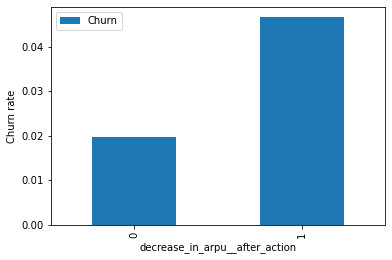

In [61]:
#Visualize the Churn rate on the basis whether the customer decreased her/his ARPU in action month
updated_data1.pivot_table(values='Churn', index='decrease_in_arpu__after_action', aggfunc='mean').plot.bar()
plt.ylabel('Churn rate')
plt.show()

__Inference__

There is increase in parameter 'decrease in recharge number' in action phase for the customers

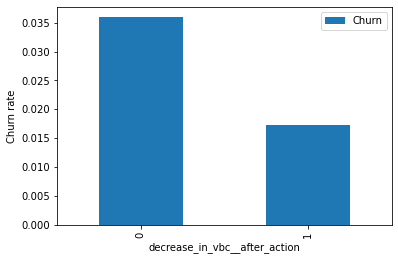

In [62]:
#Visualize Churn rate on the basis whether the customer decreased her/his volume based cost in action month
updated_data1.pivot_table(values='Churn', index='decrease_in_vbc__after_action', aggfunc='mean').plot.bar()
plt.ylabel('Churn rate')
plt.show()

__Inferences:__ 

The churn rate is more for the customers whose vbc in action month is increased. Monthly recharges are very less in action phase

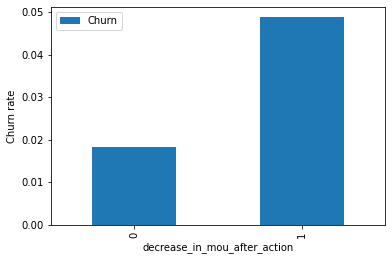

In [63]:
#Visualize the Churn rate on the basis whether the customer decreased her/his MOU in action month
updated_data1.pivot_table(values='Churn', index='decrease_in_mou_after_action', aggfunc='mean').plot.bar()
plt.ylabel('Churn rate')
plt.show()

__Inferences:__ 

We can see that the churn is higher in the customers whose mou after action phase has decreased.

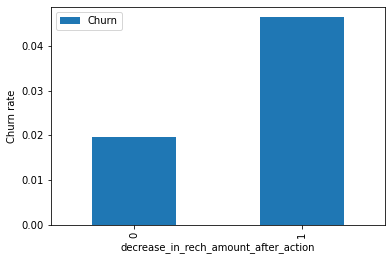

In [64]:
#Visualize the Churn rate on the basis whether the customer decreased her/his amount of recharge in action month
updated_data1.pivot_table(values='Churn', index='decrease_in_rech_amount_after_action', aggfunc='mean').plot.bar()
plt.ylabel('Churn rate')
plt.show()

__Inference__

From the above plot we can see that there is increase of churn rate for parameter decrease in recharge amount in/after action phase

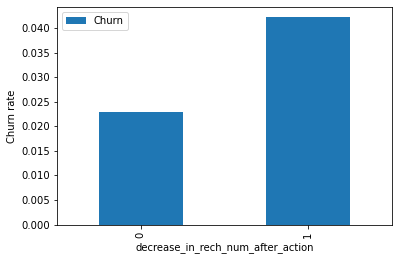

In [65]:
#Visualize Churn rate on the basis whether the customer decreased her/his number of recharge in action month
updated_data1.pivot_table(values='Churn', index='decrease_in_rech_num_after_action', aggfunc='mean').plot.bar()
plt.ylabel('Churn rate')
plt.show()

__Inference__

There is increase in parameter 'decrease in recharge number' in action phase for the customers

In [66]:
# Creating churn dataframe
churn_data = updated_data1[updated_data1['Churn'] == 1]
# Creating not churn dataframe
non_churn_data = updated_data1[updated_data1['Churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

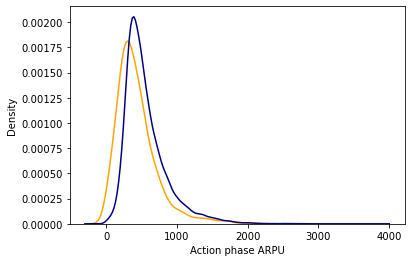

In [67]:
#Visulize the data
axis = sns.distplot(churn_data['avg_arpu_action'],label='Churn',color = 'orange',hist=False)
axis = sns.distplot(non_churn_data['avg_arpu_action'],label='not Churn',color = 'navy',hist=False)
axis.set(xlabel='Action phase ARPU')

__Inference__


-The customers with higher arpu are less likely to churn.

-ARPU for churn customers are found between 0 to 900.

-ARPU for non-churn customers are found between 0 to 1000.

[Text(0.5, 0, 'Action phase MOU')]

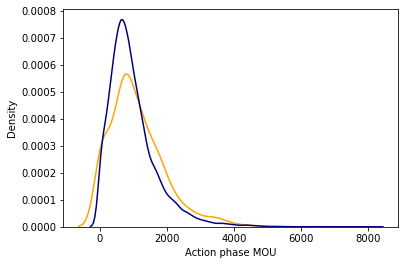

In [68]:
# Distribution plot
axis = sns.distplot(churn_data['total_mou_good'],label='Churn',color = 'orange',hist=False)
axis = sns.distplot(non_churn_data['total_mou_good'],label='non Churn', color = 'navy',hist=False)
axis.set(xlabel='Action phase MOU')

__Inference__

-Higher the MOU lesser then chances of churn.

### Bivariate Analysis

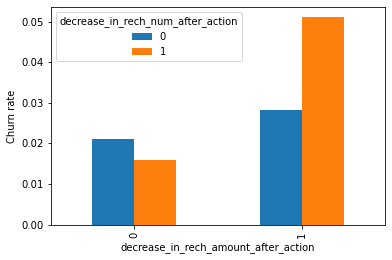

In [69]:
#Check churn rate by the decreasing recharge amount and number of recharge in the action phase
updated_data1.pivot_table(values='Churn', index='decrease_in_rech_amount_after_action', columns='decrease_in_rech_num_after_action',aggfunc='mean').plot.bar()
plt.ylabel('Churn rate')
plt.show()

__Inference__


From the above plot its clear that the churn is higher for the customers whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.


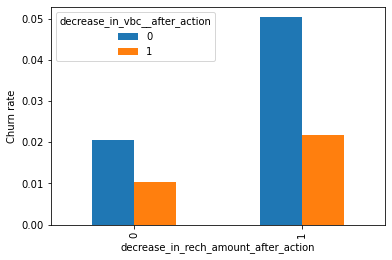

In [70]:
#Check churn rate by the decreasing recharge amount and volume based cost in the action phase
updated_data1.pivot_table(values='Churn', index='decrease_in_rech_amount_after_action', columns='decrease_in_vbc__after_action', aggfunc='mean').plot.bar()
plt.ylabel('Churn rate')
plt.show()

__Inference__

From the above plot its clear that the churn is higher for the customers whose recharge amount has decreased along with the volume based cost is increased during action month..

Text(0.5, 1.08, 'Average Numerical Columns in Action Phase')

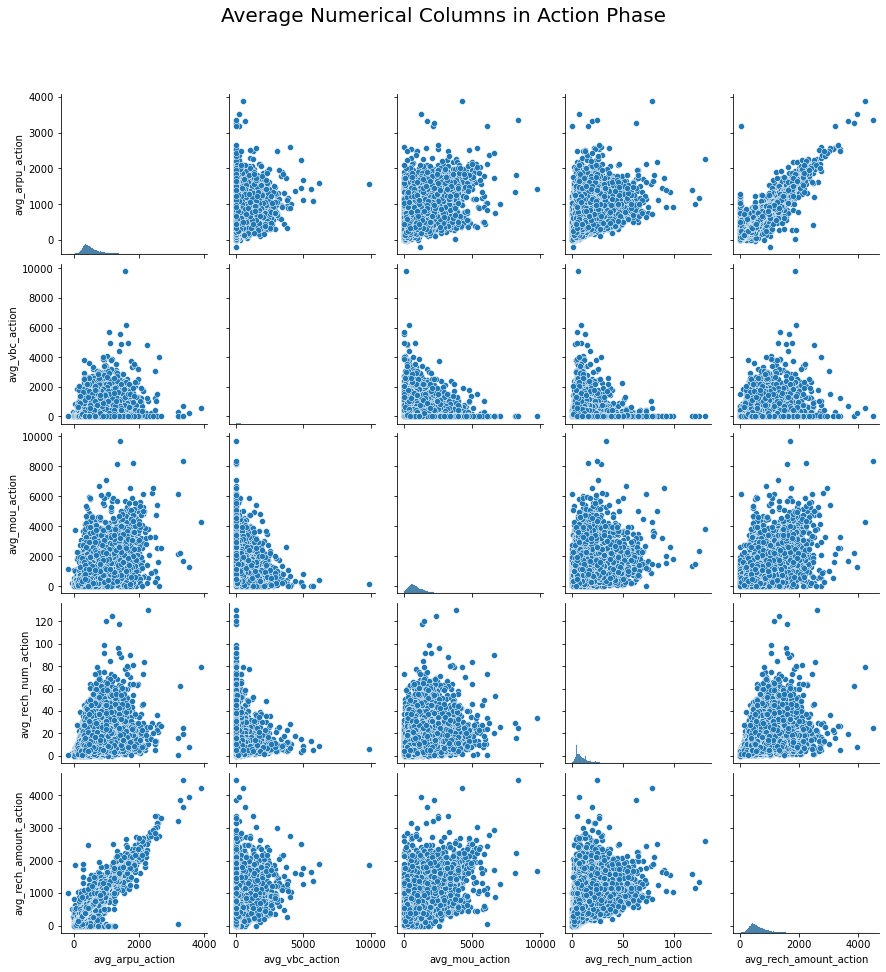

In [71]:
numerical_avg=["avg_arpu_action","avg_vbc_action","avg_mou_action","avg_rech_num_action","avg_rech_amount_action"]
ax=sns.pairplot(updated_data1[numerical_avg])
ax.fig.suptitle("Average Numerical Columns in Action Phase",y=1.08,size=20)

__Inference__
avg arpu action and avg rech amount action are linear in nature

In [72]:
# Dropping the columns which are not further useful for analysis
updated_data1 = updated_data1.drop(['total_mou_good','avg_mou_action','difference_mou','avg_rech_num_action','difference_rech_num', 'average_rech_amount_6_7',
                 'difference_rech_amount','avg_arpu_action','diff_arpu','avg_vbc_action','diff_vbc','avg_rech_amount_action'], axis=1)

## 1.6 Train & Test Split

In [73]:
# Import library
from sklearn.model_selection import train_test_split

In [74]:
# Putting feature variables into X 
X = updated_data1.drop(['mobile_number','Churn'], axis=1) #(Mobile number has no significance to create the model hence removed)

In [75]:
# Putting target variable to y
y = updated_data1['Churn']

In [76]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [77]:
y_train.value_counts()

0    21425
1      739
Name: Churn, dtype: int64

In [78]:
# %pip install imblearn

In [79]:
#Instantiate SMOTE
sm = SMOTE(random_state=35)

# Fitting and resampling SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

# Checking the value count of output after resampling
y_train.value_counts()

0    21425
1    21425
Name: Churn, dtype: int64

__Now the dataset is balanced__

## 1.7 Feature scaling

In [80]:
# Let us do the standardized scaling of the numerical features
from sklearn.preprocessing import StandardScaler

In [81]:
# Firstly we instantiate
scaler = StandardScaler()

In [82]:
columns_to_scale = X_train.columns.to_list()

# Removing the derived binary columns which are categorical in nature
columns_to_scale.remove('decrease_in_arpu__after_action')
columns_to_scale.remove('decrease_in_vbc__after_action')
columns_to_scale.remove('decrease_in_mou_after_action')
columns_to_scale.remove('decrease_in_rech_num_after_action')
columns_to_scale.remove('decrease_in_rech_amount_after_action')

In [83]:
# Fit and tranform the training dataset
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_train.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_in_arpu__after_action,decrease_in_vbc__after_action,decrease_in_mou_after_action,decrease_in_rech_num_after_action,decrease_in_rech_amount_after_action
count,42850.0,42850.0,42850.0,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,42850.0,42850.0,42850.0,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,42850.0,42850.0,42850.0,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,42850.000000,42850.000000,42850.000000,42850.000000,42850.000000
mean,0.0,0.0,0.0,5.997018e-17,2.156080e-16,-4.152765e-16,9.467339e-16,8.620098e-17,3.788672e-16,-5.231910e-17,-1.330713e-17,-1.490743e-16,1.987219e-14,-4.03

In [84]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_in_arpu__after_action,decrease_in_vbc__after_action,decrease_in_mou_after_action,decrease_in_rech_num_after_action,decrease_in_rech_amount_after_action
0,0.0,0.0,0.0,0.141291,-0.529372,-0.282007,0.102830,-0.668142,-0.466940,-0.209835,-0.637389,0.307372,-0.260546,0.002997,-0.245309,-0.304784,-0.37736,-0.413519,-0.265222,-0.313603,-0.253513,0.483649,-0.194695,-0.401873,-0.259817,-0.269186,-0.245066,-0.203431,-0.266070,-0.243167,0.127069,-0.339421,-0.421685,0.250026,-0.533990,-0.337480,-0.341747,-0.504005,0.636874,-0.146161,-0.142653,-0.120378,0.0,0.0,0.0,-0.049201,-0.733960,0.209673,-0.081595,-0.093740,-0.061826,-0.351813,-0.363425,-0.019760,-0.344439,-0.015557,-0.013735,-0.002488,-0.863798,-0.015552,-0.204858,-0.269057,-0.244425,-0.381375,-0.275851,-0.440477,-0.291646,-0.271626,-0.151184,-0.410364,-0.367465,-0.443399,-0.170472,-0.157872,0.076464,-0.163467,0.362067,-0.117412,-0.136732,-0.138394,-0.110440,0.0,0.0,0.0,-0.231185,0.109999,-0.063720,-0.475876,-0.292010,-0.423840,-0.365594,-0.089233,-0.193165,-0.151852,-0.153936,-0.126940,-0.100464,-0.120379,-0.081429,0.202323,-0.445486,0.304982,0.044215,-0.733439,-0.241224,0.054155,0.017463,0.023292,0.593344,-0.791108,-0.626502,-0.099627,0.682609,1.765610,0.529059,1.218800,-0.239730,3.226450,3.113595,-0.232127,3.999046,2.360187,2.438165,-0.224884,-0.221158,-0.215285,-0.141024,-0.135947,-0.114129,-0.361420,-0.234237,-0.264877,0.112151,1,1,1,1,1
1,0.0,0.0,0.0,-1.428500,4.419240,3.226427,-0.659535,-0.241666,-0.005215,-0.778501,2.510311,2.699545,-0.260546,-0.270855,-0.317573,-0.304784,-0.37736,-0.431543,-0.203149,0.267439,0.195742,-0.531185,1.099590,0.286017,-0.279282,-0.269186,-0.245066,-0.203431,-0.266070,-0.243167,-0.479450,0.837605,0.287121,-0.571941,-0.324984,-0.040056,-0.512757,2.279503,3.043550,-0.146161,-0.142653,-0.120378,0.0,0.0,0.0,-0.770514,1.360043,2.046205,-0.081595,-0.093740,-0.061826,-0.351813,-0.363425,-0.291878,-0.344439,-0.015557,-0.013735,-0.969261,1.658189,1.919526,-0.411674,0.190206,0.154723,-0.482645,0.739552,0.253364,-0.291646,-0.271626,-0.258730,-0.584772,0.565545

In [85]:
# Fit and tranform the training dataset
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_test.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_in_arpu__after_action,decrease_in_vbc__after_action,decrease_in_mou_after_action,decrease_in_rech_num_after_action,decrease_in_rech_amount_after_action
count,5541.0,5541.0,5541.0,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.0,5541.0,5541.0,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.0,5541.0,5541.0,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000
mean,0.0,0.0,0.0,-0.055553,0.029160,0.319805,-0.192420,-0.107475,0.131412,-0.062160,-0.019624,0.210106,-0.092159,-0.141250,-0.193803,-0.120403,-0.213687,-0.253091,0.154402,0.163865,0.222585,0.320169,0.330572,0.393714,0.149477,0.152706,0.171625,-0.012817,0.000415,0.096060,0.307942,0.319018,0.39

In [86]:
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_in_arpu__after_action,decrease_in_vbc__after_action,decrease_in_mou_after_action,decrease_in_rech_num_after_action,decrease_in_rech_amount_after_action
5704,0.0,0.0,0.0,0.244940,-0.275526,0.992136,-0.726096,-0.696345,-0.477807,0.489574,0.302534,2.294985,-0.078405,-0.270855,-0.317573,0.230603,-0.37736,-0.431543,-0.280169,-0.284743,-0.109021,0.026256,0.001839,0.031297,-0.090284,-0.269186,-0.245066,0.045382,-0.26607,-0.243167,-0.163474,-0.199504,-0.058276,-0.611968,-0.576005,-0.419853,0.351079,0.365274,2.662937,-0.146161,-0.142653,-0.120378,0.0,0.0,0.0,-0.215317,-0.156242,1.536360,-0.081595,-0.09374,-0.061826,1.069467,0.775253,0.752321,0.322422,-0.015557,-0.013735,-0.255631,-0.215455,1.339300,-0.357877,-0.097594,0.279982,0.089037,-0.116234,0.512627,-0.291646,-0.271626,-0.195344,-0.157064,-0.170153,0.464905,-0.208024,-0.195917,-0.188863,0.111650,-0.186556,-0.167648,-0.136732,-0.138394,-0.110440,0.0,0.0,0.0,-0.080420,-0.264303,-0.235925,-0.196195,-0.209892,0.284594,-0.365594,-0.089233,-0.193165,-0.151852,0.285315,-0.12694,-0.100464,-0.120379,-0.081429,-0.150599,0.263837,1.306074,0.087584,-0.244188,0.805368,0.054155,-0.176336,0.023292,0.171661,0.349272,-0.352114,3.260267,2.142934,-0.096241,-0.264724,-0.060970,0.513437,3.226450,-0.250268,-0.232127,0.451488,2.360187,2.438165,-0.224884,-0.221158,-0.215285,1.299472,1.186193,2.505283,0.224444,0.021259,0.196965,-0.258357,1,0,0,0,1
64892,0.0,0.0,0.0,0.048768,-0.786073,-0.164429,-0.734846,-0.704212,-0.503414,-0.358178,-0.578926,-0.260510,0.024835,-0.270855,-0.317573,-0.117582,-0.37736,-0.431543,-0.280332,-0.304664,-0.176759,-0.301953,-0.208017,-0.298608,-0.264840,-0.269186,-0.245066,-0.203431,-0.26607,-0.243167,-0.381424,-0.341823,-0.309670,-0.621065,-0.576005,-0.415553,-0.230624,-0.437274,-0.045765,-0.146161,-0.142653,-0.105538,0.0,0.0,0.0,-0.615753,-0.717171,-0.306861,-0.081595,-0.09374,-0.061826,-0.331115,-0.363425,-0.291878,-0.344439,-0.015557,-0.013735,-0.775449,-0.848751,-0.423406,-0.108805,-0.349837,-0.189120,0.378182,0.195419,0.237717,-0.276997,-0.258219,-0.236200,0.172282,-0.082566,

# Step2. Building the Model

## 2.1 Building models with PCA (Dimensionality reduction)

In [87]:
# Import the necessary package for dimensionality reduction
from sklearn.decomposition import PCA

In [88]:
# Instantiating PCA function
pca = PCA(random_state=50)

In [89]:
# Lets initially try to fit the Principal components
pca.fit(X_train)

PCA(random_state=50)

In [90]:
# Principal components
pca.components_

array([[-7.67770477e-20, -4.16333634e-17, -1.11022302e-16, ...,
        -2.18668429e-02, -8.22119947e-03, -2.59539046e-02],
       [-1.57889755e-19, -2.77555756e-17, -1.11022302e-16, ...,
        -8.29826332e-03, -8.92307274e-03, -1.06994608e-02],
       [ 1.88537848e-19,  2.77555756e-17,  8.32667268e-17, ...,
        -4.51086580e-02, -3.11095880e-02, -4.16175043e-02],
       ...,
       [ 0.00000000e+00,  4.95343962e-01, -1.15407767e-01, ...,
        -3.46944695e-18, -7.63278329e-17, -6.24500451e-17],
       [-0.00000000e+00, -8.34652209e-02, -2.50978481e-02, ...,
         7.45931095e-17,  4.72712147e-17, -6.72205347e-17],
       [ 9.99999969e-01,  1.82238524e-04, -3.80454767e-05, ...,
        -1.84653183e-18, -1.60258634e-18,  1.82959117e-19]])

In [91]:
# Cumulative variance of the PC's
variance_cum = np.cumsum(pca.explained_variance_ratio_)
# print(variance_cum)

#### Ploting the Scree plot 

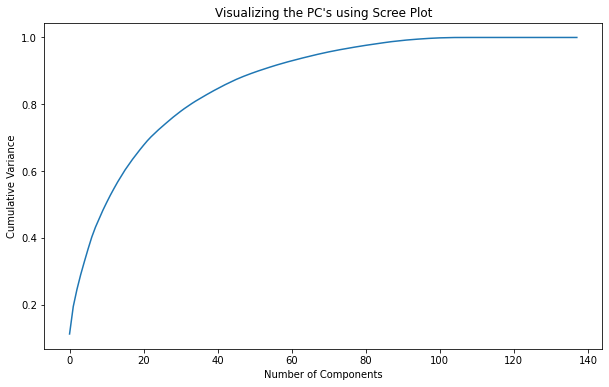

In [92]:
# Visualizing using Scree Plot

fig = plt.figure(figsize = (10,6))
plt.plot(variance_cum)
plt.title("Visualizing the PC's using Scree Plot")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

__From the above plot we can clearly say that, almost 62 components can explain around 96%-98% of variance in data. Hence we will be retaining only the 62 PC's by applying the Incremental_PCA function__

In [93]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [94]:
# Instantiating PCA with 62 components
pca_62 = IncrementalPCA(n_components=62)

# Fit and transform the X_train
X_train_pca = pca_62.fit_transform(X_train)

In [95]:
# Applying the tranform function the Test dataset
X_test_pca = pca_62.transform(X_test)

In [96]:
# Importing sklearn's logistic regression package
from sklearn.linear_model import LogisticRegression

In [97]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [98]:
# Importing the libraries used for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## 2.2 Logistic regression with PCA

### Feature Selection Using RFE

In [99]:
# Intantiate the logistic regression
logreg_pca=LogisticRegression()

In [101]:
# Intantiate RFE with 15 columns
rfe_pca = RFE(logreg_pca,n_features_to_select=15)    

# Fit the rfe model with train set
rfe_pca_train = rfe_pca.fit(X_train_pca,y_train)

In [115]:
# Creating the X_train_pca dataframe
X_train_pca_df = pd.DataFrame(X_train_pca)

X_train_pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,-0.968452,-1.465218,1.093940,-0.410046,-2.706717,-1.191409,0.650114,1.050299,0.424610,2.555696,-0.823668,2.890690,-0.805863,-0.932902,-0.196738,0.140277,0.787577,-1.103153,-0.133205,-0.047103,-0.160011,-0.923937,0.158584,-0.713003,-0.689410,0.572770,1.358964,-1.919879,0.231423,0.382606,0.715273,0.001099,-0.056169,0.735529,-0.460026,0.351371,0.816958,-1.965237,-0.215263,1.158585,0.248742,0.076200,0.419367,-0.253170,-0.126448,-0.518616,-0.495475,0.440513,1.351663,0.863570,-0.248673,1.424034,-0.439847,-0.264705,1.232389,-0.398780,0.629612,-0.874516,-0.240683,-0.414561,-0.142470,-0.155326
1,2.648333,5.777524,2.419890,-1.245821,0.293295,-5.331230,-4.169569,0.181431,0.166668,-2.012356,0.255875,-0.505344,-0.186030,-1.414137,0.092833,0.538855,-2.151714,2.734214,0.706766,0.135567,-0.934009,0.326785,-0.937800,-0.405633,0.715984,-0.514332,-0.163188,0.550616,-1.390818,1.468803,-1.652648,0.211634,-0.077928,0.673933,-0.984181,0.246318,-1.660888,-1.527754,0.304793,-0.071103,-0.019895,0.269536,-0.382146,0.224313,-0.030847,0.516756,-0.270543,-0.534966,-0.203252,0.003014,0.060407,-0.009786,0.193501,-0.027530,0.299439,-0.116809,0.393869,0.113334,-0.189894,0.141340,-0.022985,-0.127058
2,2.828312,-3.023033,3.439397,-2.253795,-2.228378,-0.349588,0.303718,0.035107,0.443898,0.490639,-0.412778,-0.615900,-0.891268,-0.981295,0.463984,-0.221967,0.720740,0.890410,-0.397105,-0.333519,0.876954,2.163956,-0.388096,-0.746104,-0.329713,-0.114905,1.409166,-1.622694,0.437008,-0.185466,0.833485,-0.346786,0.319458,-0.063387,-0.473758,-0.213803,-0.601047,1.146159,0.978360,-1.783307,-0.604640,-0.656734,-0.634631,0.079328,-0.032234,0.181689,-0.417201,-0.676593,0.161807,0.185123,-0.207750,2.226953,-0.837580,0.686643,-0.080749,-0.283983,-0.807319,0.364666,0.692937,0.446469,0.184960,-0.293761
3,1.605584,-3.418631,6.823515,-2.404396,-3.717120,0.754354,0.882271,-1.402273,0.486902,-3.117190,0.159392,-2.702158,1.756380,2.503818,-1.062773,-0.258023,-1.619187,1.210378,0.636671,0.154251,-1.225970,-1.195432,-0.217480,0.697819,0.114800,-0.697325,-2.476447,1.903795,0.123018,-1.959673,-0.081786,-1.612645,0.028011,-1.383340,-2.244202,0.836046,2.071561,-3.067161,-0.016673,3.239121,0.139564,1.321675,2.205224,0.442374,0.376065,-1.930614,-1.865893,-0.440925,3.503124,1.701320,-0.092181,-1.874265,1.092699,-1.299700,0.711326,0.565180,1.166337,-0.608463,-0.672709,-0.041528,0.133527,-0.185105
4,6.080060,1.126802,-1.302990,2.163233,0.561460,-2.401436,-0.907757,-1.180276,-2.085006,1.198953,17.658112,2.384278,-0.118949,2.510408,1.276560,-14.837945,2.282078,-1.317559,11.796430,16.403262,-0.159156,3.696315,1.749456,-3.670931,-3.706922,-1.500919,0.695459,1.368683,-1.672895,-0.141702,0.472934,-0.262722,0.305775,-0.089053,-1.104161,-1.629595,-0.523021,0.411000,-1.178799,-0.293186,2.029268,0.075115,-0.147749,-0.104361,0.966897,-0.670517,2.136918,2.780932,-3.540485,7.735800,-12.078422,-0.360276,0.647114,-1.112076,-0.512178,4.589560,0.504833,-1.846077,6.489555,-0.118711,0.964994,1.427666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42845,-3.234874,-1.556472,1.416372,-0.510000,2.364369,-1.303174,-2.384600,3.804176,-0.927848,-1.067460,-0.018838,-0.719026,0.602016,0.272531,0.343839,-0.397037,-1.973774,2.471644,0.036089,0.198038,-0.566105,0.236457,-0.189999,-0.042306,0.716798,-0.929630,-0.067772,-0.255047,-0.224461,-0.139493,-0.155478,-0.489734,0.169108,-0.110478,0.432776,0.027396,-1.162492,-1.065563,0.082209,-0.306147,0.588058,-1.211406,-0.182226,-0.013022,0.348292,-0.416250,-1.307904,-1.291999,-0.092649,-0.048499,-0.518187,-0.119004,-0.010564,0.035613,-0.296822,-0.627729,-0.130945,-0.938108,-0.003101,-0.175988,0.278381,0.2012

In [123]:
pc_list = []
for i in range(0,62):
    pc_list.append("PC" + str(i+1))
pc_list

X_train_pca_df.columns = pc_list
X_train_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62
0,-0.968452,-1.465218,1.093940,-0.410046,-2.706717,-1.191409,0.650114,1.050299,0.424610,2.555696,-0.823668,2.890690,-0.805863,-0.932902,-0.196738,0.140277,0.787577,-1.103153,-0.133205,-0.047103,-0.160011,-0.923937,0.158584,-0.713003,-0.689410,0.572770,1.358964,-1.919879,0.231423,0.382606,0.715273,0.001099,-0.056169,0.735529,-0.460026,0.351371,0.816958,-1.965237,-0.215263,1.158585,0.248742,0.076200,0.419367,-0.253170,-0.126448,-0.518616,-0.495475,0.440513,1.351663,0.863570,-0.248673,1.424034,-0.439847,-0.264705,1.232389,-0.398780,0.629612,-0.874516,-0.240683,-0.414561,-0.142470,-0.155326
1,2.648333,5.777524,2.419890,-1.245821,0.293295,-5.331230,-4.169569,0.181431,0.166668,-2.012356,0.255875,-0.505344,-0.186030,-1.414137,0.092833,0.538855,-2.151714,2.734214,0.706766,0.135567,-0.934009,0.326785,-0.937800,-0.405633,0.715984,-0.514332,-0.163188,0.550616,-1.390818,1.468803,-1.652648,0.211634,-0.077928,0.673933,-0.984181,0.246318,-1.660888,-1.527754,0.304793,-0.071103,-0.019895,0.269536,-0.382146,0.224313,-0.030847,0.516756,-0.270543,-0.534966,-0.203252,0.003014,0.060407,-0.009786,0.193501,-0.027530,0.299439,-0.116809,0.393869,0.113334,-0.189894,0.141340,-0.022985,-0.127058
2,2.828312,-3.023033,3.439397,-2.253795,-2.228378,-0.349588,0.303718,0.035107,0.443898,0.490639,-0.412778,-0.615900,-0.891268,-0.981295,0.463984,-0.221967,0.720740,0.890410,-0.397105,-0.333519,0.876954,2.163956,-0.388096,-0.746104,-0.329713,-0.114905,1.409166,-1.622694,0.437008,-0.185466,0.833485,-0.346786,0.319458,-0.063387,-0.473758,-0.213803,-0.601047,1.146159,0.978360,-1.783307,-0.604640,-0.656734,-0.634631,0.079328,-0.032234,0.181689,-0.417201,-0.676593,0.161807,0.185123,-0.207750,2.226953,-0.837580,0.686643,-0.080749,-0.283983,-0.807319,0.364666,0.692937,0.446469,0.184960,-0.293761
3,1.605584,-3.418631,6.823515,-2.404396,-3.717120,0.754354,0.882271,-1.402273,0.486902,-3.117190,0.159392,-2.702158,1.756380,2.503818,-1.062773,-0.258023,-1.619187,1.210378,0.636671,0.154251,-1.225970,-1.195432,-0.217480,0.697819,0.114800,-0.697325,-2.476447,1.903795,0.123018,-1.959673,-0.081786,-1.612645,0.028011,-1.383340,-2.244202,0.836046,2.071561,-3.067161,-0.016673,3.239121,0.139564,1.321675,2.205224,0.442374,0.376065,-1.930614,-1.865893,-0.440925,3.503124,1.701320,-0.092181,-1.874265,1.092699,-1.299700,0.711326,0.565180,1.166337,-0.608463,-0.672709,-0.041528,0.133527,-0.185105
4,6.080060,1.126802,-1.302990,2.163233,0.561460,-2.401436,-0.907757,-1.180276,-2.085006,1.198953,17.658112,2.384278,-0.118949,2.510408,1.276560,-14.837945,2.282078,-1.317559,11.796430,16.403262,-0.159156,3.696315,1.749456,-3.670931,-3.706922,-1.500919,0.695459,1.368683,-1.672895,-0.141702,0.472934,-0.262722,0.305775,-0.089053,-1.104161,-1.629595,-0.523021,0.411000,-1.178799,-0.293186,2.029268,0.075115,-0.147749,-0.104361,0.966897,-0.670517,2.136918,2.780932,-3.540485,7.735800,-12.078422,-0.360276,0.647114,-1.112076,-0.512178,4.589560,0.504833,-1.846077,6.489555,-0.118711,0.964994,1.427666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42845,-3.234874,-1.556472,1.416372,-0.510000,2.364369,-1.303174,-2.384600,3.804176,-0.927848,-1.067460,-0.018838,-0.719026,0.602016,0.272531,0.343839,-0.397037,-1.973774,2.471644,0.036089,0.198038,-0.566105,0.236457,-0.189999,-0.042306,0.716798,-0.929630,-0.067772,-0.255047,-0.224461,-0.139493,-0.155478,-0.489734,0.169108,-0.110478,0.432776,0.027396,-1.162492,-1.065563,0.082209,-0.306147,0.588058,-1.211406,-0.182226,-0.013022,0.348292,-0.416250,-1.307904,-1.291999,-0.092649

In [160]:
# Similarly creating the X_test_pca dataframe
X_test_pca_df = pd.DataFrame(X_test_pca)

X_test_pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,1.135183,0.999367,2.125491,-0.904970,-2.498962,-4.168477,-0.254384,1.478274,-0.350419,2.103085,-0.616878,1.690530,-0.081720,-0.486267,0.128086,0.192967,1.938454,-1.473024,0.117212,-0.616135,1.071723,0.356339,-0.144567,-0.448389,0.209365,0.016096,-0.258923,0.621116,0.721606,-0.038592,0.070993,0.947656,-0.337060,1.512741,-1.093920,-0.400118,0.469954,-0.944900,0.603278,-0.429640,-0.341191,-0.580056,0.283299,0.661656,-2.311499,-0.786224,1.631852,-0.996432,1.206809,0.476997,-0.562049,-0.967914,0.529693,0.680169,0.458031,-0.435338,-0.065286,0.461149,-0.021361,0.466766,-0.015302,0.336091
1,2.788858,-4.265626,5.154434,3.996637,-4.812206,-0.475240,1.495731,0.496080,0.971683,3.248689,-1.009421,9.074302,1.327475,0.382741,-2.025758,-1.631828,-2.011867,-1.118145,-1.288331,3.443618,0.206830,1.008290,-0.656375,-0.929597,-0.641352,-0.450094,-0.385613,-0.339356,1.202553,0.776191,0.376431,1.026795,-0.526149,0.256695,1.258135,0.272218,-1.404280,1.352615,-0.374564,-1.734225,-0.101606,-0.542001,-0.855698,0.221530,-0.665808,0.387787,2.759980,-0.723084,0.609026,0.580231,-0.798186,-0.768927,-0.060034,-0.101290,1.743648,0.319172,2.345823,-0.449661,2.358444,-0.872711,1.457227,0.506412
2,4.650267,-0.956963,0.574025,-2.853353,5.188939,-0.042237,-0.512110,-1.838550,2.851147,1.607570,-0.141998,0.035125,-1.921508,0.204573,-1.812422,0.079685,4.039810,-0.604932,0.412693,-0.148580,0.988742,-0.395244,-0.895977,-0.376411,1.390634,-0.357882,0.188269,-0.907874,-2.007769,0.806605,0.974577,-0.062852,-0.296085,0.339461,0.161628,1.073973,0.193245,0.938824,-0.143272,-0.435455,-0.324776,0.727677,1.126468,-0.510385,-0.931791,-0.143195,-0.150913,-0.018544,-0.261829,-0.145877,0.327830,0.028105,-0.004390,1.188920,-0.278510,1.002821,-0.347810,-0.597661,0.277584,-0.587010,-0.097299,-0.102373
3,4.124457,-1.343373,-2.465611,-0.754971,1.439623,1.382899,0.911891,-0.324364,-0.458726,-0.488530,-0.395406,0.177279,0.262810,-0.225202,1.440732,0.853013,1.582932,0.865010,0.457497,-0.071004,-0.707729,0.001690,-1.640352,-0.398666,-0.104035,0.133207,-0.059443,-0.241406,-0.224966,0.224088,-0.590490,0.309776,-0.606801,-0.261445,0.403737,1.204647,0.182723,-0.777371,0.837247,-1.127273,-0.764999,0.402884,-0.054583,-0.003965,-0.153182,-0.096019,0.054643,0.142645,-0.311747,0.158242,-0.062002,0.022540,0.142071,-0.134354,-0.090597,-0.215174,0.221789,0.158553,-0.309400,-0.135962,-0.055823,0.064859
4,6.064425,6.451510,1.775199,1.570943,-3.079460,6.377962,1.381423,4.026321,0.634807,3.502066,-1.187604,2.350719,-3.160110,-1.800795,-0.850012,0.587013,2.988130,-2.017972,2.372665,-1.728808,1.675910,-0.768396,0.364855,0.378337,0.549711,-0.656563,-2.797514,3.321263,0.113285,-2.033671,-0.259873,-1.560725,0.041882,0.718856,0.945932,0.028285,-1.615229,-0.205606,-0.648280,1.031841,0.065502,-0.979678,-1.531773,0.724950,-1.269434,-1.365405,-0.288892,0.408622,-1.235732,-0.094884,-0.553975,-0.123515,-0.058451,-0.124975,0.214756,0.157711,0.050369,1.169182,0.154091,0.031365,-0.060427,0.229092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5536,7.287088,-1.070159,-4.124802,-0.112995,0.024753,-0.871056,0.487220,-0.095593,-1.855918,-1.098198,0.338437,-0.788330,-1.400674,-0.414718,-1.646611,-0.649132,-0.123788,0.053422,0.378539,1.201931,-0.087065,0.052327,0.089510,2.816959,-1.505676,0.698606,0.309115,0.777631,0.873484,-0.312959,-1.370611,2.005385,4.530940,-0.706796,0.281357,1.161512,-0.259197,0.112425,-0.225862,-0.162887,0.607631,-0.786541,-0.616060,0.982116,0.118397,-0.077420,-0.065804,0.674590,0.388580,-0.256678,-0.263655,0.113416,-0.166628,-0.007611,-0.410398,-0.036381,0.773913,0.338139,0.189774,-0.516861,-0.169397,0.145630
5537,4.110351,-0.8

In [161]:
pc_list = []
for i in range(0,62):
    pc_list.append("PC" + str(i+1))
pc_list

X_test_pca_df.columns = pc_list
X_test_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62
0,1.135183,0.999367,2.125491,-0.904970,-2.498962,-4.168477,-0.254384,1.478274,-0.350419,2.103085,-0.616878,1.690530,-0.081720,-0.486267,0.128086,0.192967,1.938454,-1.473024,0.117212,-0.616135,1.071723,0.356339,-0.144567,-0.448389,0.209365,0.016096,-0.258923,0.621116,0.721606,-0.038592,0.070993,0.947656,-0.337060,1.512741,-1.093920,-0.400118,0.469954,-0.944900,0.603278,-0.429640,-0.341191,-0.580056,0.283299,0.661656,-2.311499,-0.786224,1.631852,-0.996432,1.206809,0.476997,-0.562049,-0.967914,0.529693,0.680169,0.458031,-0.435338,-0.065286,0.461149,-0.021361,0.466766,-0.015302,0.336091
1,2.788858,-4.265626,5.154434,3.996637,-4.812206,-0.475240,1.495731,0.496080,0.971683,3.248689,-1.009421,9.074302,1.327475,0.382741,-2.025758,-1.631828,-2.011867,-1.118145,-1.288331,3.443618,0.206830,1.008290,-0.656375,-0.929597,-0.641352,-0.450094,-0.385613,-0.339356,1.202553,0.776191,0.376431,1.026795,-0.526149,0.256695,1.258135,0.272218,-1.404280,1.352615,-0.374564,-1.734225,-0.101606,-0.542001,-0.855698,0.221530,-0.665808,0.387787,2.759980,-0.723084,0.609026,0.580231,-0.798186,-0.768927,-0.060034,-0.101290,1.743648,0.319172,2.345823,-0.449661,2.358444,-0.872711,1.457227,0.506412
2,4.650267,-0.956963,0.574025,-2.853353,5.188939,-0.042237,-0.512110,-1.838550,2.851147,1.607570,-0.141998,0.035125,-1.921508,0.204573,-1.812422,0.079685,4.039810,-0.604932,0.412693,-0.148580,0.988742,-0.395244,-0.895977,-0.376411,1.390634,-0.357882,0.188269,-0.907874,-2.007769,0.806605,0.974577,-0.062852,-0.296085,0.339461,0.161628,1.073973,0.193245,0.938824,-0.143272,-0.435455,-0.324776,0.727677,1.126468,-0.510385,-0.931791,-0.143195,-0.150913,-0.018544,-0.261829,-0.145877,0.327830,0.028105,-0.004390,1.188920,-0.278510,1.002821,-0.347810,-0.597661,0.277584,-0.587010,-0.097299,-0.102373
3,4.124457,-1.343373,-2.465611,-0.754971,1.439623,1.382899,0.911891,-0.324364,-0.458726,-0.488530,-0.395406,0.177279,0.262810,-0.225202,1.440732,0.853013,1.582932,0.865010,0.457497,-0.071004,-0.707729,0.001690,-1.640352,-0.398666,-0.104035,0.133207,-0.059443,-0.241406,-0.224966,0.224088,-0.590490,0.309776,-0.606801,-0.261445,0.403737,1.204647,0.182723,-0.777371,0.837247,-1.127273,-0.764999,0.402884,-0.054583,-0.003965,-0.153182,-0.096019,0.054643,0.142645,-0.311747,0.158242,-0.062002,0.022540,0.142071,-0.134354,-0.090597,-0.215174,0.221789,0.158553,-0.309400,-0.135962,-0.055823,0.064859
4,6.064425,6.451510,1.775199,1.570943,-3.079460,6.377962,1.381423,4.026321,0.634807,3.502066,-1.187604,2.350719,-3.160110,-1.800795,-0.850012,0.587013,2.988130,-2.017972,2.372665,-1.728808,1.675910,-0.768396,0.364855,0.378337,0.549711,-0.656563,-2.797514,3.321263,0.113285,-2.033671,-0.259873,-1.560725,0.041882,0.718856,0.945932,0.028285,-1.615229,-0.205606,-0.648280,1.031841,0.065502,-0.979678,-1.531773,0.724950,-1.269434,-1.365405,-0.288892,0.408622,-1.235732,-0.094884,-0.553975,-0.123515,-0.058451,-0.124975,0.214756,0.157711,0.050369,1.169182,0.154091,0.031365,-0.060427,0.229092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5536,7.287088,-1.070159,-4.124802,-0.112995,0.024753,-0.871056,0.487220,-0.095593,-1.855918,-1.098198,0.338437,-0.788330,-1.400674,-0.414718,-1.646611,-0.649132,-0.123788,0.053422,0.378539,1.201931,-0.087065,0.052327,0.089510,2.816959,-1.505676,0.698606,0.309115,0.777631,0.873484,-0.312959,-1.370611,2.005385,4.530940,-0.706796,0.281357,1.161512,-0.259197,0.112425,-0.225862,-0.162887,0.607631,-0.786541,-0.616060,0.982116,0.118397,-0.077420,-0.065804,0.674590,0.388580,-0.256678,-0.26365

In [124]:
# RFE selected columns
rfe_cols_pca = X_train_pca_df.columns[rfe_pca_train.support_]
print(rfe_cols_pca)

Index(['PC1', 'PC5', 'PC7', 'PC18', 'PC25', 'PC26', 'PC27', 'PC33', 'PC34', 'PC39', 'PC44', 'PC45', 'PC54', 'PC55', 'PC56'], dtype='object')


### Model-1 with RFE selected columns

In [137]:
from statsmodels.api import add_constant, GLM, families

In [138]:
# Adding constant to X_train_pca
X_train_sm_1 = add_constant(X_train_pca_df[rfe_cols_pca])

# sm.add_c
#Instantiate the model
log_no_pca_1 = GLM(y_train, X_train_sm_1, family=families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16306.
Date:                Thu, 30 Jun 2022   Deviance:                       32611.
Time:                        19:33:00   Pearson chi2:                 1.95e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5965      0.017    -34.356      0.000      -0.631      -0.562
PC1           -0.8045      0.009    -94.353      0.000      -0.821      -0.788
PC5            0.3253      0.008     40.978      0.000       0.310       0.341
PC7            0.2607      0.007     35.169      0.000       0.246       0.275
PC18           0.5267      0.012     45.428      0.000       0.504       0.549
PC25          -0.4210      0.025    -16.969      0.000      -0.470      -0.372
PC26          -0.7293      0.025    -29.571      0.000      -0.778      -0.681
PC27          -0.3138      0.016    -19.326      0.000      -0.346      -0.282
PC33          -0.2524      0.020    -12.861      0.000      -0.291      -0.214
PC34           0.3566      0.019     18.793      0.000       0.319       0.394
PC39           0.3555      0.032     11.226      0.000       0.293       0.418
PC44           0.2721      0.020     13.314      0.000       0.232       0.312
PC45           0.2458      0.020     12.029      0.000       0.206       0.286
PC54          -0.4486      0.026    -17.240      0.000      -0.500      -0.398
PC55          -0.2911      0.025    -11.497      0.000      -0.341      -0.241
PC56           0.3036      0.031      9.846      0.000       0.243       0.364
==============================================================================
"""

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_pca_df[rfe_cols_pca].columns
vif['VIF'] = [variance_inflation_factor(X_train_pca_df[rfe_cols_pca].values, i) for i in range(X_train_pca_df[rfe_cols_pca].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,PC1,1.0
1,PC5,1.0
2,PC7,1.0
3,PC18,1.0
4,PC25,1.0
5,PC26,1.0
6,PC27,1.0
7,PC33,1.0
8,PC34,1.0
9,PC39,1.0


In [140]:
# Let's get the predicted value on the train dataset
y_train_pred_pca = log_no_pca_1.predict(X_train_sm_1)
y_train_pred_pca.head()

0    0.127370
1    0.136761
2    0.032902
3    0.323318
4    0.111415
dtype: float64

In [141]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.127370,0
1,0,0.136761,1
2,0,0.032902,2
3,0,0.323318,3
4,0,0.111415,4


In [142]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.127370,0,1,1,0,0,0,0,0,0,0,0
1,0,0.136761,1,1,1,0,0,0,0,0,0,0,0
2,0,0.032902,2,1,0,0,0,0,0,0,0,0,0
3,0,0.323318,3,1,1,1,1,0,0,0,0,0,0
4,0,0.111415,4,1,1,0,0,0,0,0,0,0,0


In [143]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.719790     0.978296     0.461284
0.2          0.2  0.772019     0.955893     0.588145
0.3          0.3  0.802357     0.924621     0.680093
0.4          0.4  0.823851     0.894889     0.752812
0.5          0.5  0.837433     0.860677     0.814189
0.6          0.6  0.842987     0.819183     0.866791
0.7          0.7  0.834679     0.755613     0.913746
0.8          0.8  0.797130     0.642474     0.951785
0.9          0.9  0.650782     0.318086     0.983477


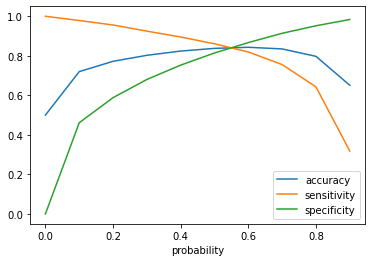

In [144]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

__Inference__

Accuracy - Accuracy becomes stable when nearing 0.55

Sensitivity - There is decrease seen in Sensitivity as probability increases.

Specificity -There is increase seen in Specificity as probability increases.

All the three parameters intersect at 0.55. Here we are considering sensitivity than on accuracy. So, we would take 0.5 as optimim probability cut off for attaining higher sensitivity.

In [145]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.127370,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.136761,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.032902,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.323318,3,1,1,1,1,0,0,0,0,0,0,0
4,0,0.111415,4,1,1,0,0,0,0,0,0,0,0,0


In [146]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[17444  3981]
 [ 2985 18440]]


In [147]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8374329054842474
Sensitivity:- 0.8606767794632438
Specificity:- 0.8141890315052509


In [149]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

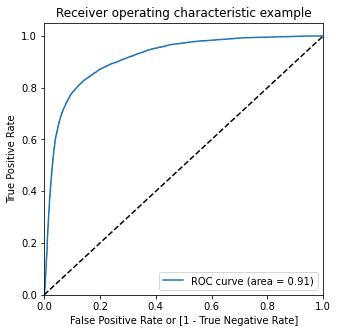

In [150]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, which is the Gini of the model.
ROC AUC value is 0.91

In [162]:
# Taking a copy of the test set
X_test_log_pca = X_test_pca_df.copy()

In [163]:
X_test_log_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62
0,1.135183,0.999367,2.125491,-0.904970,-2.498962,-4.168477,-0.254384,1.478274,-0.350419,2.103085,-0.616878,1.690530,-0.081720,-0.486267,0.128086,0.192967,1.938454,-1.473024,0.117212,-0.616135,1.071723,0.356339,-0.144567,-0.448389,0.209365,0.016096,-0.258923,0.621116,0.721606,-0.038592,0.070993,0.947656,-0.337060,1.512741,-1.093920,-0.400118,0.469954,-0.944900,0.603278,-0.429640,-0.341191,-0.580056,0.283299,0.661656,-2.311499,-0.786224,1.631852,-0.996432,1.206809,0.476997,-0.562049,-0.967914,0.529693,0.680169,0.458031,-0.435338,-0.065286,0.461149,-0.021361,0.466766,-0.015302,0.336091
1,2.788858,-4.265626,5.154434,3.996637,-4.812206,-0.475240,1.495731,0.496080,0.971683,3.248689,-1.009421,9.074302,1.327475,0.382741,-2.025758,-1.631828,-2.011867,-1.118145,-1.288331,3.443618,0.206830,1.008290,-0.656375,-0.929597,-0.641352,-0.450094,-0.385613,-0.339356,1.202553,0.776191,0.376431,1.026795,-0.526149,0.256695,1.258135,0.272218,-1.404280,1.352615,-0.374564,-1.734225,-0.101606,-0.542001,-0.855698,0.221530,-0.665808,0.387787,2.759980,-0.723084,0.609026,0.580231,-0.798186,-0.768927,-0.060034,-0.101290,1.743648,0.319172,2.345823,-0.449661,2.358444,-0.872711,1.457227,0.506412
2,4.650267,-0.956963,0.574025,-2.853353,5.188939,-0.042237,-0.512110,-1.838550,2.851147,1.607570,-0.141998,0.035125,-1.921508,0.204573,-1.812422,0.079685,4.039810,-0.604932,0.412693,-0.148580,0.988742,-0.395244,-0.895977,-0.376411,1.390634,-0.357882,0.188269,-0.907874,-2.007769,0.806605,0.974577,-0.062852,-0.296085,0.339461,0.161628,1.073973,0.193245,0.938824,-0.143272,-0.435455,-0.324776,0.727677,1.126468,-0.510385,-0.931791,-0.143195,-0.150913,-0.018544,-0.261829,-0.145877,0.327830,0.028105,-0.004390,1.188920,-0.278510,1.002821,-0.347810,-0.597661,0.277584,-0.587010,-0.097299,-0.102373
3,4.124457,-1.343373,-2.465611,-0.754971,1.439623,1.382899,0.911891,-0.324364,-0.458726,-0.488530,-0.395406,0.177279,0.262810,-0.225202,1.440732,0.853013,1.582932,0.865010,0.457497,-0.071004,-0.707729,0.001690,-1.640352,-0.398666,-0.104035,0.133207,-0.059443,-0.241406,-0.224966,0.224088,-0.590490,0.309776,-0.606801,-0.261445,0.403737,1.204647,0.182723,-0.777371,0.837247,-1.127273,-0.764999,0.402884,-0.054583,-0.003965,-0.153182,-0.096019,0.054643,0.142645,-0.311747,0.158242,-0.062002,0.022540,0.142071,-0.134354,-0.090597,-0.215174,0.221789,0.158553,-0.309400,-0.135962,-0.055823,0.064859
4,6.064425,6.451510,1.775199,1.570943,-3.079460,6.377962,1.381423,4.026321,0.634807,3.502066,-1.187604,2.350719,-3.160110,-1.800795,-0.850012,0.587013,2.988130,-2.017972,2.372665,-1.728808,1.675910,-0.768396,0.364855,0.378337,0.549711,-0.656563,-2.797514,3.321263,0.113285,-2.033671,-0.259873,-1.560725,0.041882,0.718856,0.945932,0.028285,-1.615229,-0.205606,-0.648280,1.031841,0.065502,-0.979678,-1.531773,0.724950,-1.269434,-1.365405,-0.288892,0.408622,-1.235732,-0.094884,-0.553975,-0.123515,-0.058451,-0.124975,0.214756,0.157711,0.050369,1.169182,0.154091,0.031365,-0.060427,0.229092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5536,7.287088,-1.070159,-4.124802,-0.112995,0.024753,-0.871056,0.487220,-0.095593,-1.855918,-1.098198,0.338437,-0.788330,-1.400674,-0.414718,-1.646611,-0.649132,-0.123788,0.053422,0.378539,1.201931,-0.087065,0.052327,0.089510,2.816959,-1.505676,0.698606,0.309115,0.777631,0.873484,-0.312959,-1.370611,2.005385,4.530940,-0.706796,0.281357,1.161512,-0.259197,0.112425,-0.225862,-0.162887,0.607631,-0.786541,-0.616060,0.982116,0.118397,-0.077420,-0.065804,0.674590,0.388580,-0.256678,-0.26365

In [164]:
# Taking only the columns, which addre selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log_pca[rfe_cols_pca]

In [180]:
# Adding constant on the test set
X_test_sm = add_constant(X_test_log)

# Predict on the test set
y_test_pred = log_no_pca_1.predict(X_test_sm)

# Checking the head
y_test_pred.head()

0    0.035456
1    0.013887
2    0.020711
3    0.079618
4    0.002210
dtype: float64

In [169]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
0,0.035456
1,0.013887
2,0.020711
3,0.079618
4,0.002210


In [170]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [171]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

y_test_pred_final.head()

,Churn,CustID,0
0,0,5704,0.035456
1,0,64892,0.013887
2,0,39613,0.020711
3,0,93118,0.079618
4,0,81235,0.002210


In [172]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [173]:
# # Rearranging the columns
# y_test_pred_final = y_test_pred_final.reindex_axis(['CustID','churn','churn_prob'], axis=1)

# y_test_pred_final.head()

# In the test set using probablity cutoff 0.6, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)

y_test_pred_final.head()

,Churn,CustID,churn_prob,test_predicted
0,0,5704,0.035456,0
1,0,64892,0.013887,0
2,0,39613,0.020711,0
3,0,93118,0.079618,0
4,0,81235,0.002210,0


#### Metric Calculation

In [174]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4616  732]
 [  45  148]]


In [175]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [176]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8597726042230645
Sensitivity:- 0.7668393782383419
Specificity:- 0.8631264023934181


In [179]:
# CHecking the ROC AUC score for train
roc_auc_score(y_true=y_train,y_score=log_no_pca_1.predict(X_train_sm_1))

0.9145347851246308

In [178]:
# CHecking the ROC AUC score for train
roc_auc_score(y_true=y_test,y_score=log_no_pca_1.predict(X_test_sm))

0.8727450288907577

#### Model summary

- Train set
    - Accuracy = 0.83
    - Sensitivity = 0.86
    - Specificity =  0.81
    - ROC AUC Score = 0.91
- Test set
    - Accuracy = 0.84
    - Sensitivity = 0.72
    - Specificity = 0.85
    - ROC AUC Score =  0.87

## 2.3 Decision tree with PCA

In [263]:
# Importing the package for decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [264]:
# Hyperparameter tuning

# Create the parameter grid 
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50)
}


# Instantiate the grid search model
desc_tree = DecisionTreeClassifier(random_state=52)

grid_search = GridSearchCV(estimator = desc_tree, 
                           param_grid=  params, 
                           scoring= 'recall', # Recall is used as scoring parameter coz -> emphasis is more on "Churn"
                           cv = 5, 
                           verbose = 1, n_jobs=True)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=52),
             n_jobs=True,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [265]:
# Cross-Validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.966488,0.009835,0.003772,0.002626,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.784131,0.829172,0.877013,0.794866,0.843174,0.825671,0.033553,5
1,0.962065,0.009959,0.003233,0.002077,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.784131,0.829172,0.877013,0.794866,0.843174,0.825671,0.033553,5
2,1.132522,0.198004,0.006405,0.005879,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.783197,0.828938,0.870945,0.793232,0.843407,0.823944,0.032300,7
3,1.120715,0.131750,0.004235,0.002343,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.783197,0.828938,0.870945,0.793232,0.843407,0.823944,0.032300,7
4,1.988837,0.169647,0.006296,0.002863,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.890548,0.908751,0.910852,0.898716,0.915053,0.904784,0.008916,1
5,1.726991,0.141230,0.004579,0.000484,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.890548,0.908751,0.910852,0.898716,0.915053,0.904784,0.008916,1
6,1.703153,0.079924,0.004810,0.000803,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.860910,0.896616,0.864877,0.876779,0.889382,0.877713,0.013722,3
7,1.847674,0.167883,0.005392,0.001021,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.860910,0.896616,0.864877,0.876779,0.889382,0.877713,0.013722,3


In [266]:
# Printing best score and the best estimator
print("Best recall value/sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best recall value/sensitivity:- 0.9047841306884481
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=52)


__Building the final model with Optimal hyperparmter__

In [267]:
# Model with optimal hyperparameters
desc_tree_optimal = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 52,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

desc_tree_optimal.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=52)

__Making Prediction on train dataset__

In [268]:
# Lets Predict on the train dataset
y_train_pred_DT = desc_tree_optimal.predict(X_train_pca)
y_train_pred_DT

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

#### Creation of Confusion matrix

In [269]:
# Creating Confusion matrix
confusion_mat = metrics.confusion_matrix(y_train, y_train_pred_DT)
print(confusion_mat)

[[18542  2883]
 [ 1535 19890]]


In [270]:
TP = confusion_mat[1,1] # True Positive (TP)
TN = confusion_mat[0,0] # True Negatives (TN)
FP = confusion_mat[0,1] # False Positives (FP)
FN = confusion_mat[1,0] # False Negatives (FN)

In [271]:
# Calculating Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred_DT))  

# Calculating Sensitivity/Precison
print("Sensitivity:-",TP / float(TP+FN))   #( True Postive/ Total Postive)

# Calculating Specificity
print("Specificity:-", TN / float(TN+FP))  #( True Negative / Total Negative)

Accuracy:- 0.8968961493582264
Sensitivity:- 0.9283547257876312
Specificity:- 0.8654375729288215


__Making Prediction on test dataset__

In [272]:
# Lets Predict on the test dataset
y_test_pred_DT = desc_tree_optimal.predict(X_test_pca)
y_test_pred_DT

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

#### Creation of Confusion matrix

In [273]:
# Creating Confusion matrix
confusion_mat_test = metrics.confusion_matrix(y_test, y_test_pred_DT)
print(confusion_mat_test)

[[4533  815]
 [  54  139]]


In [274]:
TP = confusion_mat_test[1,1] # True Positive (TP)
TN = confusion_mat_test[0,0] # True Negatives (TN)
FP = confusion_mat_test[0,1] # False Positives (FP)
FN = confusion_mat_test[1,0] # False Negatives (FN)

In [275]:
# Calculating Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred_DT))  

# Calculating Sensitivity/Precison
print("Sensitivity:-",TP / float(TP+FN))   #( True Postive/ Total Postive)

# Calculating Specificity
print("Specificity:-", TN / float(TN+FP))  #( True Negative / Total Negative)

Accuracy:- 0.8431691030499909
Sensitivity:- 0.7202072538860104
Specificity:- 0.8476065818997757


In [309]:
# ROC function
def draw_roc( actual, predict ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, predict,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, predict )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative (TN)]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    return None

#### ROC AUC Score

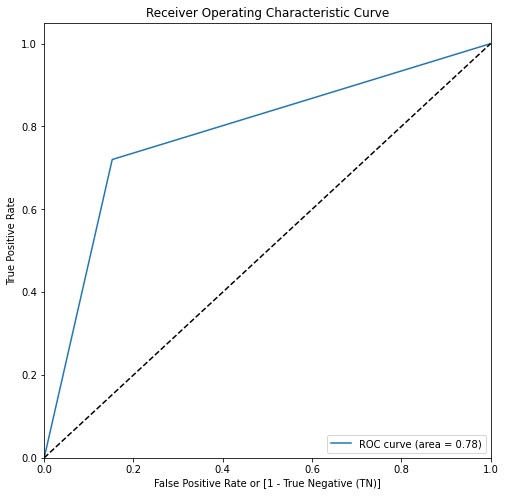

In [277]:
# Lets create a dataframe to store both Actual and Predicted value
y_test_pred_DT_ =pd.DataFrame({'Converted':y_test.values,'Predicted':y_test_pred_DT})

# lets view the first 5 rows
y_test_pred_DT_.sample(10)

fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_DT_.Converted, y_test_pred_DT_.Predicted, drop_intermediate = False )

# Calling the ROC function
draw_roc(y_test_pred_DT_.Converted, y_test_pred_DT_.Predicted)

In [278]:
roc_auc_score(y_true=y_train, y_score = rfc_model.predict(X_train_pca))

0.8462310385064177

In [279]:
roc_auc_score(y_true=y_test, y_score = rfc_model.predict(X_test_pca))

0.7815938164865274

#### Model summary

- Train set
    - Accuracy = 0.90
    - Sensitivity = 0.93
    - Specificity = 0.86
    - ROC AUC Score = 0.84
- Test set
    - Accuracy = 0.85
    - Sensitivity = 0.76
    - Specificity = 0.86
    - ROC AUC Score =  0.78

## 2.4 Random Forest (Ensemble) with PCA

In [280]:
# Importing the package for Random-forest ensemble classifier
from sklearn.ensemble import RandomForestClassifier 

In [297]:
# Hyperparameter tuning

# Create the parameter grid 
params = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(100, 300, 50),
    'min_samples_split': range(50, 300, 50),
    'n_estimators': [50,100,200,300], 
    'max_features': [10, 20]
}


# Instantiate the grid search model
random_forest = RandomForestClassifier(random_state=52)

grid_search = GridSearchCV(estimator = random_forest, 
                           param_grid= params, 
                           cv = 4,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 4 folds for each of 160 candidates, totalling 640 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=52), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(100, 300, 50),
                         'min_samples_split': range(50, 300, 50),
                         'n_estimators': [50, 100, 200, 300]},
             return_train_score=True, verbose=1)

In [298]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8409799778413042 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 100}


In [299]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=100, 
                             min_samples_split=50,
                             max_features=20,
                             n_estimators=100)

In [300]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=100,
                       min_samples_split=50)

In [301]:
# Predictions on the train set
y_train_pred_RF = rfc_model.predict(X_train_pca)

In [302]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred_RF)
print(confusion)

[[17494  3931]
 [ 2688 18737]]


In [303]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [304]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred_RF))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8455309218203034
Sensitivity:- 0.8745390898483081
Specificity:- 0.8165227537922987


In [305]:
# Prediction on the test set
y_test_pred_RF = rfc_model.predict(X_test_pca)

In [306]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred_RF)
print(confusion)

[[4321 1027]
 [  49  144]]


In [307]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [308]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred_RF))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8058112254105757
Sensitivity:- 0.7461139896373057
Specificity:- 0.8079655946148093


#### ROC AUC Score

In [309]:
# ROC function
def draw_roc( actual, predict ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, predict,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, predict )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative (TN)]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    return None

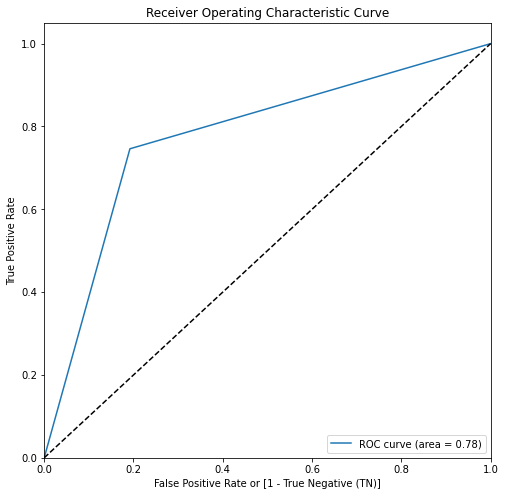

In [310]:
y_test_pred_RF_ =pd.DataFrame({'Converted':y_test.values,'Predicted':y_test_pred_RF})

# lets view the first 5 rows
y_test_pred_RF_.sample(10)

fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_RF_.Converted, y_test_pred_RF_.Predicted, drop_intermediate = False )

# Calling the ROC function
draw_roc(y_test_pred_RF_.Converted, y_test_pred_RF_.Predicted)

In [311]:
roc_auc_score(y_true=y_train, y_score = rfc_model.predict(X_train_pca))

0.8455309218203035

In [312]:
roc_auc_score(y_true=y_test, y_score = rfc_model.predict(X_test_pca))

0.7770397921260574

#### Model summary

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.87
    - Specificity = 0.81
    - ROC AUC Score = 0.85
- Test set
    - Accuracy = 0.80
    - Sensitivity = 0.74
    - Specificity = 0.81
    - ROC AUC Score = 0.78

## Step 3. Without PCA
### 3.1 Logistic regression without PCA

We follow Hybrid approach here. Firstly reduce the feature down to 15 important feature which is an automated approach using <font color="red">RFE</font>. After selected the 15 feature from RFE, we go ahead with manual approach by checking the VIF and P values of each built model

### Feature Selection Using RFE

In [87]:
# Lets import Logistic regression from Scikit learn
from sklearn.linear_model import LogisticRegression
# Import RFE
from sklearn.feature_selection import RFE
# Importing statsmodels
import statsmodels.api as sm
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler

In [88]:
# Intantiate the logistic regression
logreg=LogisticRegression()

In [89]:
# Intantiate RFE with 15 columns
rfe = RFE(logreg,n_features_to_select=15)    

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [90]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'og_others_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8', 'total_ic_mou_8', 'ic_others_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_in_vbc__after_action'], dtype='object')


### Model-1 with RFE selected columns

In [91]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 30 Jun 2022   Deviance:                       31320.
Time:                        10:25:42   Pearson chi2:                 9.57e+06
No. Iterations:                    41                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -53.4911   4235.290     -0.013      0.990   -8354.508    8247.526
offnet_mou_7                      0.7007      0.026     27.236      0.000       0.650       0.751
offnet_mou_8                     -3.5106      0.110    -32.002      0.000      -3.726      -3.296
roam_og_mou_8                     1.2905      0.033     39.298      0.000       1.226       1.355
std_og_t2m_mou_8                  2.5233      0.096     26.199      0.000       2.335       2.712
isd_og_mou_8                     -0.7021      0.146     -4.818      0.000      -0.988      -0.416
og_others_7                      -1.2597      0.761     -1.656      0.098      -2.750       0.231
og_others_8                   -3819.6343   3.08e+05     -0.012      0.990   -6.08e+05    6.01e+05
loc_ic_t2m_mou_8                 -0.5275      0.083     -6.378      0.000      -0.690      -0.365
loc_ic_t2f_mou_8                 -0.6804      0.063    -10.774      0.000      -0.804      -0.557
std_ic_t2f_mou_8                 -0.5397      0.076     -7.129      0.000      -0.688      -0.391
total_ic_mou_8                   -1.3641      0.072    -19.036      0.000      -1.505      -1.224
ic_others_8                      -1.5395      0.140    -10.970      0.000      -1.815      -1.264
monthly_2g_8                     -0.9244      0.047    -19.743      0.000      -1.016      -0.833
monthly_3g_8                     -1.0850      0.050    -21.859      0.000      -1.182      -0.988
decrease_in_vbc__after_action    -1.2062      0.072    -16.816      0.000      -1.347      -1.066
=================================================================================================
"""

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,7.90
3,std_og_t2m_mou_8,6.75
7,loc_ic_t2m_mou_8,3.26
10,total_ic_mou_8,3.24
0,offnet_mou_7,1.91
2,roam_og_mou_8,1.18
8,loc_ic_t2f_mou_8,1.18
14,decrease_in_vbc__after_action,1.07
13,monthly_3g_8,1.06
6,og_others_8,1.05


__Inference__
- From the above, we can clearly see that "og_others_8" is having p > 0.05. Hence its clearly insignificant. We will be removing this.

In [93]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)
len(log_cols)

['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8', 'total_ic_mou_8', 'ic_others_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_in_vbc__after_action']


14

### Model-2 with RFE selected columns

In [95]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15696.
Date:                Thu, 30 Jun 2022   Deviance:                       31392.
Time:                        10:27:56   Pearson chi2:                 9.52e+06
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.0467      0.030    -35.008      0.000      -1.105      -0.988
offnet_mou_7                      0.6992      0.026     27.223      0.000       0.649       0.750
offnet_mou_8                     -3.5137      0.110    -32.070      0.000      -3.728      -3.299
roam_og_mou_8                     1.2907      0.033     39.513      0.000       1.227       1.355
std_og_t2m_mou_8                  2.5253      0.096     26.251      0.000       2.337       2.714
isd_og_mou_8                     -0.7606      0.153     -4.985      0.000      -1.060      -0.462
og_others_7                      -1.7606      0.735     -2.397      0.017      -3.200      -0.321
loc_ic_t2m_mou_8                 -0.5218      0.083     -6.310      0.000      -0.684      -0.360
loc_ic_t2f_mou_8                 -0.6791      0.063    -10.755      0.000      -0.803      -0.555
std_ic_t2f_mou_8                 -0.5518      0.076     -7.261      0.000      -0.701      -0.403
total_ic_mou_8                   -1.3686      0.072    -19.081      0.000      -1.509      -1.228
ic_others_8                      -1.5355      0.140    -10.947      0.000      -1.810      -1.261
monthly_2g_8                     -0.9296      0.047    -19.729      0.000      -1.022      -0.837
monthly_3g_8                     -1.0836      0.050    -21.847      0.000      -1.181      -0.986
decrease_in_vbc__after_action    -1.2075      0.072    -16.846      0.000      -1.348      -1.067
=================================================================================================
"""

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,7.90
3,std_og_t2m_mou_8,6.75
6,loc_ic_t2m_mou_8,3.26
9,total_ic_mou_8,3.24
0,offnet_mou_7,1.91
2,roam_og_mou_8,1.18
7,loc_ic_t2f_mou_8,1.18
13,decrease_in_vbc__after_action,1.07
12,monthly_3g_8,1.06
11,monthly_2g_8,1.05


__Inference__
- From the above, we can clearly see that "offnet_mou_8" is having VIF > 5 . Hence its clearly has multicollinearity. We will be removing this.

In [97]:
# Removing offnet_mou_8 column 
log_cols.remove('offnet_mou_8')
print(log_cols)
len(log_cols)

['offnet_mou_7', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8', 'total_ic_mou_8', 'ic_others_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_in_vbc__after_action']


13

### Model-3 with RFE selected columns

In [98]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42836
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16475.
Date:                Thu, 30 Jun 2022   Deviance:                       32951.
Time:                        10:28:38   Pearson chi2:                 4.57e+06
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.1499      0.031    -37.438      0.000      -1.210      -1.090
offnet_mou_7                      0.4514      0.022     20.509      0.000       0.408       0.495
roam_og_mou_8                     0.6999      0.025     27.893      0.000       0.651       0.749
std_og_t2m_mou_8                 -0.3939      0.021    -18.691      0.000      -0.435      -0.353
isd_og_mou_8                     -0.9392      0.161     -5.817      0.000      -1.256      -0.623
og_others_7                      -2.3158      0.798     -2.900      0.004      -3.881      -0.751
loc_ic_t2m_mou_8                 -1.9049      0.079    -24.239      0.000      -2.059      -1.751
loc_ic_t2f_mou_8                 -0.7439      0.065    -11.494      0.000      -0.871      -0.617
std_ic_t2f_mou_8                 -0.7149      0.079     -8.998      0.000      -0.871      -0.559
total_ic_mou_8                   -1.4711      0.073    -20.227      0.000      -1.614      -1.329
ic_others_8                      -1.5447      0.135    -11.441      0.000      -1.809      -1.280
monthly_2g_8                     -0.9454      0.047    -20.074      0.000      -1.038      -0.853
monthly_3g_8                     -1.2102      0.054    -22.278      0.000      -1.317      -1.104
decrease_in_vbc__after_action    -1.2331      0.071    -17.455      0.000      -1.372      -1.095
=================================================================================================
"""

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_ic_mou_8,3.22
5,loc_ic_t2m_mou_8,2.94
0,offnet_mou_7,1.74
2,std_og_t2m_mou_8,1.74
6,loc_ic_t2f_mou_8,1.17
12,decrease_in_vbc__after_action,1.07
11,monthly_3g_8,1.06
1,roam_og_mou_8,1.05
10,monthly_2g_8,1.05
7,std_ic_t2f_mou_8,1.04


<font color="blue">Inference :-</font> <br></br><br></br>From the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that Model-3 log_no_pca_3 will be the final model.

###  Model performance on the train set

In [100]:
log_no_pca_3

In [101]:
# Let's get the predicted value on the train dataset
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    2.979376e-01
1    2.295022e-01
2    9.034086e-02
3    2.758526e-03
4    6.213610e-20
dtype: float64

In [102]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,2.979376e-01,0
1,0,2.295022e-01,1
2,0,9.034086e-02,2
3,0,2.758526e-03,3
4,0,6.213610e-20,4


In [103]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.979376e-01,0,1,1,1,0,0,0,0,0,0,0
1,0,2.295022e-01,1,1,1,1,0,0,0,0,0,0,0
2,0,9.034086e-02,2,1,0,0,0,0,0,0,0,0,0
3,0,2.758526e-03,3,1,0,0,0,0,0,0,0,0,0
4,0,6.213610e-20,4,1,0,0,0,0,0,0,0,0,0


In [104]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.743757     0.981424     0.506091
0.2          0.2  0.776779     0.965694     0.587865
0.3          0.3  0.800747     0.948611     0.652882
0.4          0.4  0.820933     0.929988     0.711879
0.5          0.5  0.836639     0.900583     0.772695
0.6          0.6  0.842614     0.848915     0.836313
0.7          0.7  0.836663     0.770828     0.902497
0.8          0.8  0.752159     0.543944     0.960373
0.9          0.9  0.577153     0.169848     0.984457


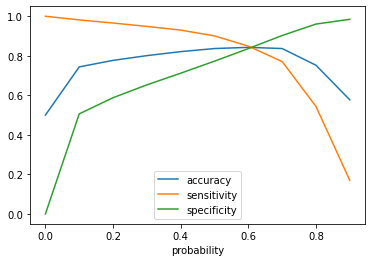

In [105]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

__Inference__

Accuracy - Accuracy becomes stable when its on 0.6

Sensitivity - There is decrease seen in Sensitivity as probability increases.

Specificity -There is increase seen in Specificity as probability increases.

All the three parameters intersect at 0.6. Here we are considering sensitivity than on accuracy. So, we would take 0.6 as optimim probability cut off for attaining higher sensitivity.

In [106]:
# Creating a column with name "predicted", which is the predicted value for 0.6 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,2.979376e-01,0,1,1,1,0,0,0,0,0,0,0,0
1,0,2.295022e-01,1,1,1,1,0,0,0,0,0,0,0,0
2,0,9.034086e-02,2,1,0,0,0,0,0,0,0,0,0,0
3,0,2.758526e-03,3,1,0,0,0,0,0,0,0,0,0,0
4,0,6.213610e-20,4,1,0,0,0,0,0,0,0,0,0,0


In [107]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[17918  3507]
 [ 3237 18188]]


In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8426137689614935
Sensitivity:- 0.8489148191365228
Specificity:- 0.8363127187864644


In [110]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

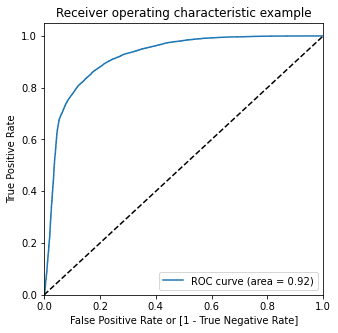

In [111]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, which is the Gini of the model.
ROC AUC value is 0.92

In [112]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [116]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

y_test_pred.head()

5704     0.055449
64892    0.000207
39613    0.458260
93118    0.055581
81235    0.010193
dtype: float64

In [117]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.055449
64892,0.000207
39613,0.458260
93118,0.055581
81235,0.010193


In [118]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [119]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

y_test_pred_final.head()

,Churn,CustID,0
0,0,5704,0.055449
1,0,64892,0.000207
2,0,39613,0.458260
3,0,93118,0.055581
4,0,81235,0.010193


In [120]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [122]:
# # Rearranging the columns
# y_test_pred_final = y_test_pred_final.reindex_axis(['CustID','churn','churn_prob'], axis=1)

# y_test_pred_final.head()

# In the test set using probablity cutoff 0.6, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)

y_test_pred_final.head()

,Churn,CustID,churn_prob,test_predicted
0,0,5704,0.055449,0
1,0,64892,0.000207,0
2,0,39613,0.458260,0
3,0,93118,0.055581,0
4,0,81235,0.010193,0


#### Metric Calculation

In [125]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4417  931]
 [  41  152]]


In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8245804006497022
Sensitivity:- 0.7875647668393783
Specificity:- 0.8259162303664922


### Top recomendation of features

In [150]:
imp_Features = pd.DataFrame(log_no_pca_3.params, columns= ["coefficents"]).drop(labels=["const"])
imp_Features["abs_coefficents"] = imp_Features.apply(lambda x : abs(x))
imp_Features.sort_values(by="abs_coefficents",ascending = False,inplace=True)
imp_Features.drop(labels=["abs_coefficents"], axis=1,inplace=True)
imp_Features

,coefficents
og_others_7,-2.315775
loc_ic_t2m_mou_8,-1.904903
ic_others_8,-1.544708
total_ic_mou_8,-1.471109
decrease_in_vbc__after_action,-1.233140
monthly_3g_8,-1.210178
monthly_2g_8,-0.945390
isd_og_mou_8,-0.939204
loc_ic_t2f_mou_8,-0.743880
std_ic_t2f_mou_8,-0.714920


We can see that the variables are inversely correlated with the churn probablity as values are negative.




__Recomendations__

- Our target the customers are those whose outgoing others charge in July and incoming others on August are less.
- Customers whose incoming mou for operators T to other operator decreased in August are likely to churn.
- Incoming from others decreased in month of august are likely to churn.
- Customers whose vbc in action phase increased are likely to churn. So they can be a good target.
- Monthly recharge in the month of august in 2g or 3g decreased this customers would likely churn.
- The customers in month of august whose isd outgoing and local incoming and std incoming and std out going calls have decreased would likely churn.